# Aprendizaje Automático - Práctica 1 - Búsqueda Iterativa de Óptimos y Regresión Lineal

#### Valoración máxima: 12 puntos (+2 puntos de Bonus)

#### Fecha límite de entrega: 2 de Abril de 2023 a las 23:59

#### Entrega a través de https://pradogrado2223.ugr.es/

### Nombre completo: <mark>Javier Moreno Morón</mark>



---

Este trabajo, cuya puntuación máxima será de 12 puntos (+2 puntos de bonus), pretende servir como práctica y refuerzo de los conocimientos adquiridos en teoría, relativos al algoritmo de optimización por gradiente descendente y a regresión lineal.

Límite de entrega: **2 de Abril de 2023 a las 23:59 (PRADO)**


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero .ipynb). No es necesario entregar ninguna memoria externa, pero el código debe estar bien comentado, y todas las decisiones tomadas y el trabajo desarrollado deben documentarse suficientemente en celdas de texto. 

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final, dado que es altamente improbable que se extienda la fecha de entrega.  

- Reiterar que es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también una valoración razonada sobre la calidad de los
resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado. 

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo. 

- El codigo NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook. 

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- El código debe estar obligatoriamente comentado explicando lo que realizan los distintos apartados y/o bloques.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: BÚSQUEDA ITERATIVA DE ÓPTIMOS (6.5 puntos)</font>

### <font color='blue'>(1.5 puntos) Implementación de Gradiente Descendente.</font>



#### <font color='blue'>(a) Implementar el algoritmo de gradiente descendente y verificar su correcto funcionamiento con una función convexa. </font>


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd #Para hacer tablas

In [4]:
'''
Esta función muestra una figura 3D con la función a optimizar junto con el 
óptimo encontrado y la ruta seguida durante la optimización.
    rng_val: rango de valores a muestrear en np.linspace()
    fun: función a optimizar y mostrar
    ws: conjunto de pesos (pares de valores [x,y] que va recorriendo el optimizador
                           en su búsqueda iterativa hacia el óptimo)
    views: ángulo de visión desde el que se mostrará la función en 3D
    colormap: mapa de color empleado en la visualización
    title_fig: título superior de la figura
    
Ejemplo de uso: display_figure(2, E, ws, [45,30], 'plasma','Descenso de gradiente')
'''

def display_figure(rng_val, fun, ws, views, colormap, title_fig):
    x = np.linspace(-rng_val, rng_val, 50)
    y = np.linspace(-rng_val, rng_val, 50)
    X, Y = np.meshgrid(x, y)
    Z = fun(np.array([X, Y]))
    fig = plt.figure(figsize=(25, 15))
    ax = fig.add_subplot(projection="3d") #He modificado esta línea ya que daba un warning, según he entendido leyendo el warning es porque estaba desactualizada para las nuevas versiones de matplotlib 
    ax.plot_surface(X, Y, Z, edgecolor='none', rstride=1,
                            cstride=1, cmap=colormap, alpha=.6)
    if len(ws)>0:
        ws = np.asarray(ws)
        min_point = np.array([ws[-1,0],ws[-1,1]])
        min_point_ = min_point[:, np.newaxis]
        ax.plot(ws[:,0], ws[:,1], fun(ws.transpose()), 'r*', markersize=3)
        ax.plot(min_point_[0], min_point_[1], fun(min_point_), 'r*', markersize=10)
    if len(title_fig)>0:
        fig.suptitle(title_fig, fontsize=16)
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('E(u,v)')
    ax.view_init(azim=views[0], elev=views[1])
    plt.show()

In [2]:
'''
Esta función toma como entrada:
- w_ini: punto inicial
- lr: learning rate
- grad_fun: función gradiente con la que se opera
- fun: función que se quiere minimizar
- epsilon: umbral que permite, si fun(w) >= epsilon, parar el algoritmo
- max_iters: número máximo de iteraciones que permite, si se alcanza ese valor, parar el algoritmo
- show_evol: flag que, si es True, muestra la evolución de los pesos, el gradiente y el valor de la función. De utilidad para depuración de código. 

Y proporciona como salida: 
- w: mínimo encontrado
- it: iteración en que se encontró
- ws: lista con todos los puntos recorridos durante la trayectoria. Téngase en cuenta que ws[-1]==w
'''
def gd(w_ini, lr, grad_fun, fun, epsilon, max_iters = 100000, show_evol = False): 
    it = 0
    w = w_ini.copy()
    ws = []
    ws.append(w.copy())
    if show_evol:
      print('w_ini = ', w)
      print('fun(w) = ', fun(w))
      print('grad_fun(w) = ', grad_fun(w))
    # Criterio de parada: numero de iteraciones y 
    # valor de f inferior a epsilon
    while it < max_iters and fun(w) >= epsilon:
        w = w-lr*grad_fun(w)
        it = it+1
        ws.append(w.copy())
        if show_evol:
          print('w_{} = {}'.format(it,w))
          print('fun(w) = ', fun(w))
          print('grad_fun(w) = ', grad_fun(w))

    return w, it, ws
    


<font color='blue'>Verifíquese el correcto funcionamiento del código implementado con la función convexa $E(u,v)=u^2+v^2$, cuyo mínimo se encuentra en el punto $(0.0,0.0)$. Punto inicial: $(-4.0, 4.0)$, $\textit{learning rate}$ ($\eta$) de $0.01$, $100.000$ como número máximo de iteraciones, y $\epsilon = 1e-50$.</font>

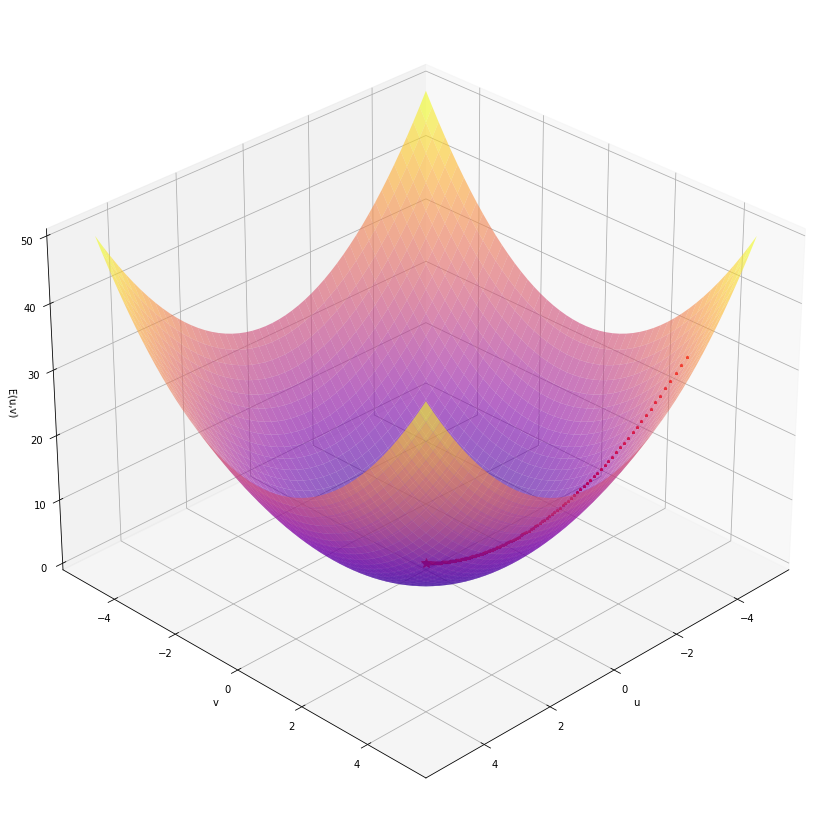

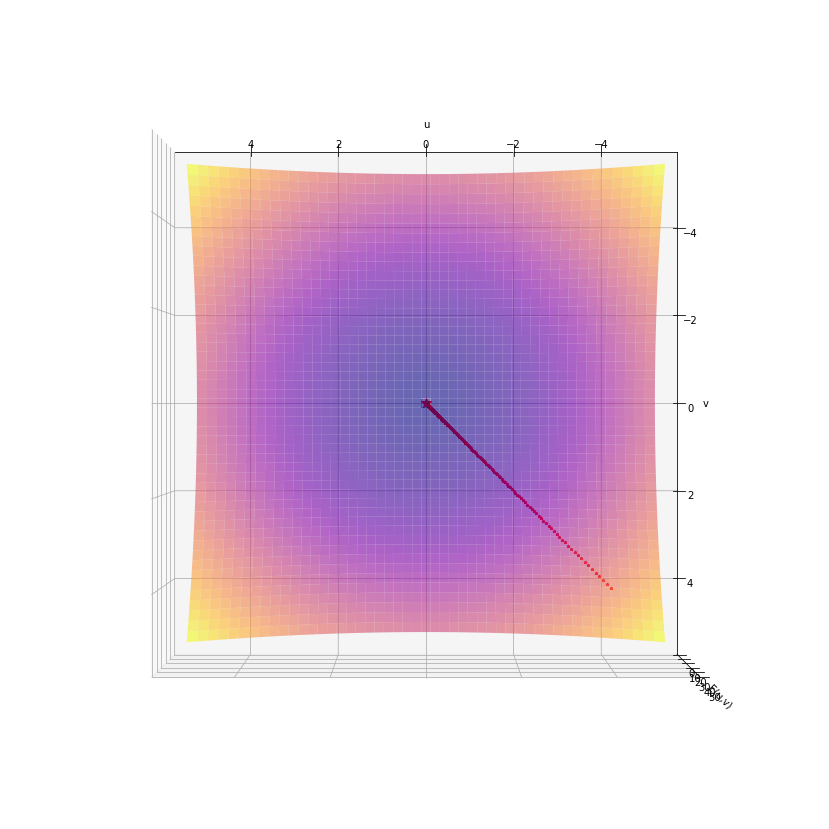

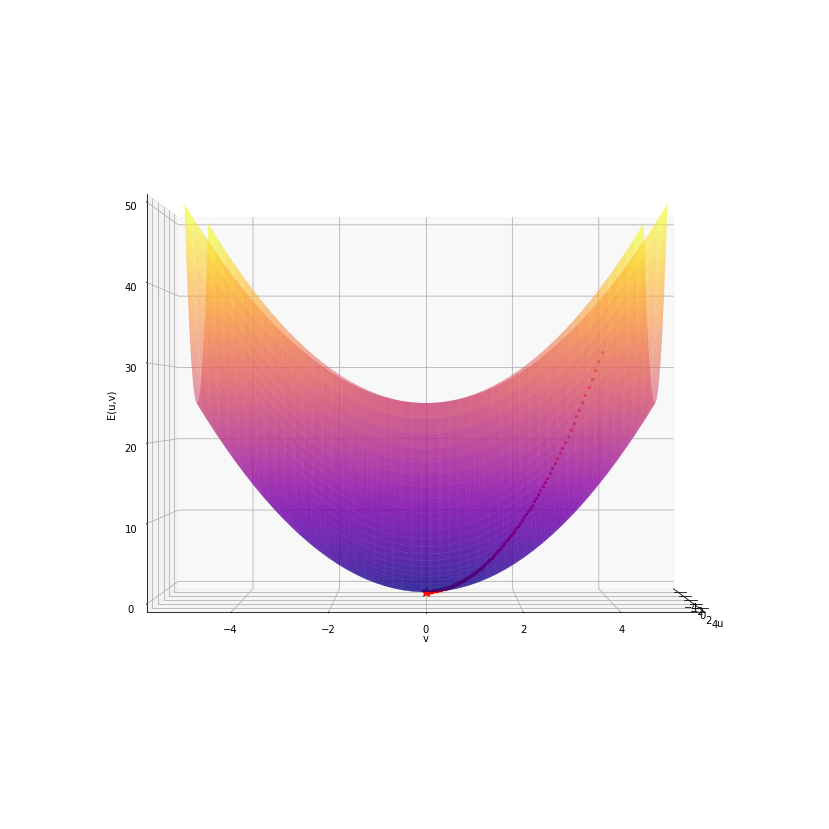

In [5]:
def E(w):
  u = w[0]
  v = w[1]
  return u**2.0 + v**2.0

# Derivada parcial de E respecto de u
def E_u(w):
  return w[0]*2

# Derivada parcial de E respecto de v
def E_v(w):
    return w[1]*2
    
# Gradiente de E
def gradE(w):
    return np.array([E_u(w), E_v(w)])

w, k, ws = gd(np.array([-4.0,4.0]), 0.01, gradE, E, 1e-50, show_evol = False)

display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')
display_figure(5, E, ws, [0,0], 'plasma','')

En este apartado lo que hacemos es calcular el punto óptimo de la función: $E(u, v)= u^{2}+ v^{2}$, para ello usamos el gradiente descendente, esto es un método iterativo que a partir de un punto inicial va buscando la pendiente más pronunciada de la zona de ese punto, así hasta llegar a ese punto óptimo, eso o hasta que alcanza un número máximo de iteraciones que le hayamos indicado. 

Para calcular el gradiente descendente usamos la siguiente fórmula: $w_j=w_j-lr\cdot gradE(w_j)$
*   $w_j$ es el punto en el que está situado en ese momento el algoritmo.
*   $lr$ es la learning rate, dependiendo del tamaño el algoritmo seleccionará más o menos $w_j$, pudiendo saltarse el óptimo si $lr$ es muy grande o ir muy lento si es muy pequeña.
*   $grandE(w_j)$ es pendiente en el punto $E(w_j)$, esta se calcula con las derivadas parciales de $E(u, v)$, las cuales son:
* * E_u = $2\cdot u$
* * E_v = $2\cdot v$

Una vez ejecutamos el código, este nos da como resultado que el punto óptimo es el $(0,0)$, viendo la gráfica impresa salta a la vista que ese punto es el mínimo de la gráfica, junto con la gráfica se imprime el camino que ha ido haciendo el algoritmo para llegar al mínimo.






<font color='blue'>¿Cuántas iteraciones ha empleado el algoritmo hasta converger? ¿Qué punto ha alcanzado? Comente también si el comportamiento del algoritmo es el esperado y porqué lo considera así. </font>

In [ ]:
print ('Numero de iteraciones: ', k)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Coordenadas obtenidas redondeadas: (', round(w[0], 2), ', ', round(w[1], 2),')')

Numero de iteraciones:  2936
Coordenadas obtenidas: ( -6.947334735484934e-26 ,  6.947334735484934e-26 )
Coordenadas obtenidas redondeadas: ( -0.0 ,  0.0 )


Redondeo el resultado para que se lea con más claridad, yo mismo al ejecutar la celda por primera vez pensaba que me daba un resultado erróneo, no me habia fijado en el e-26.

Como ya he comentado antes $(0,0)$ es el valor correcto. 

#### <font color='blue'>b) Realizar la misma operación que en el apartado (a), pero con el gradiente normalizado. ¿Qué diferencias se observan?</font> 

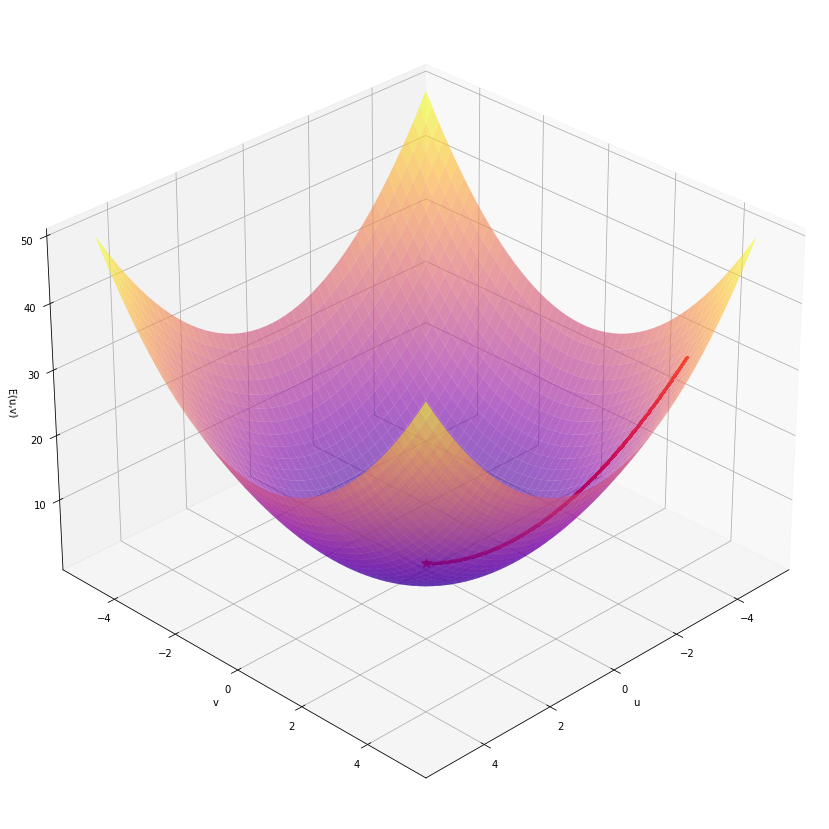

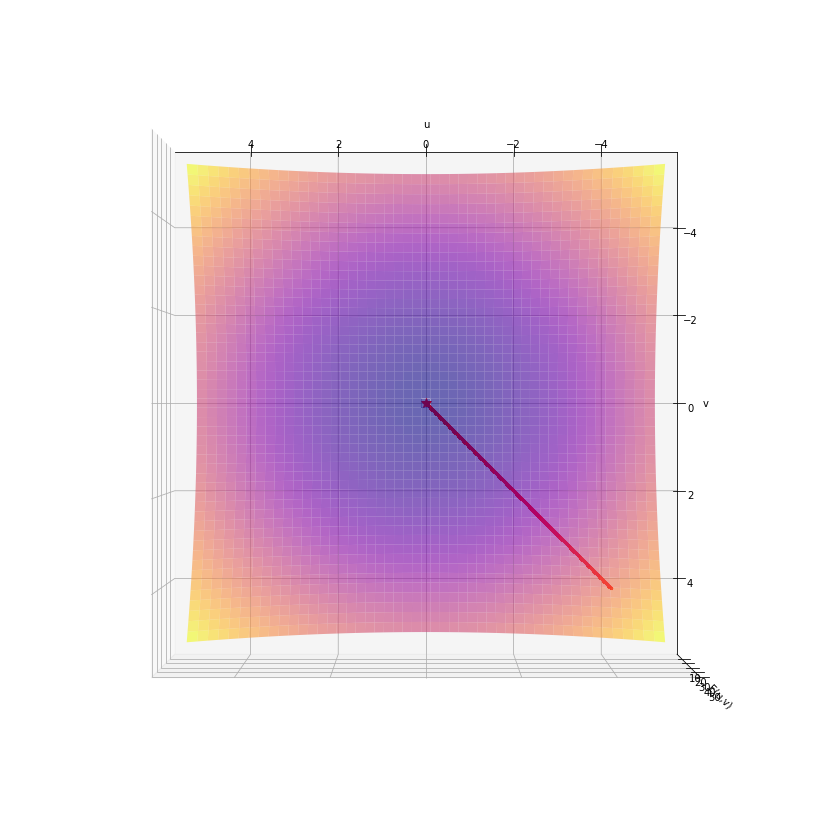

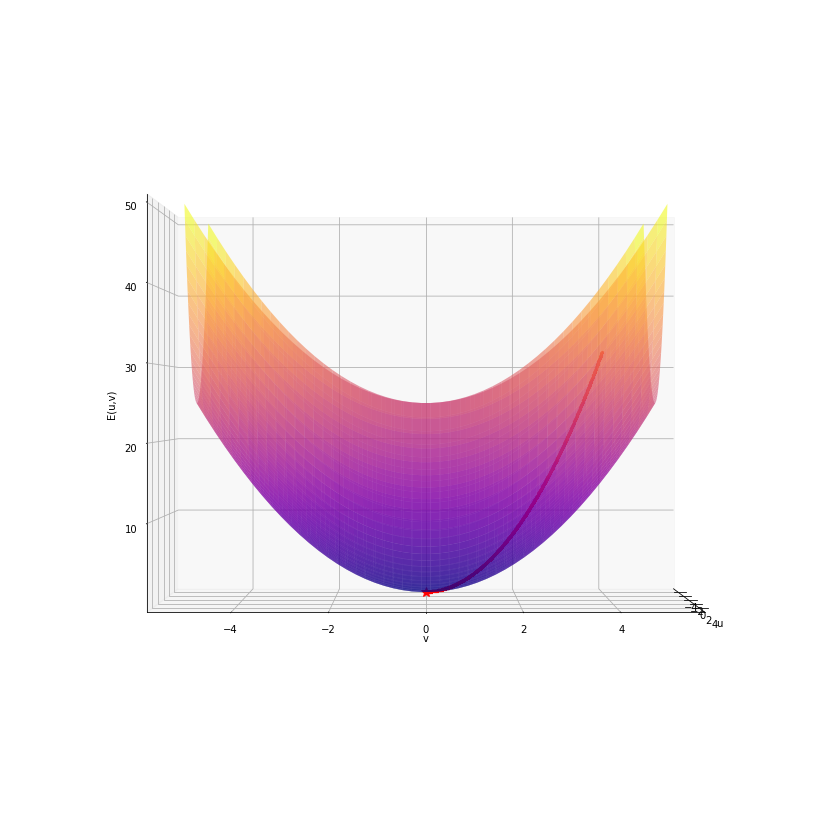

In [ ]:
'''
Esta función es idéntica a la anterior, pero la actualización de w se realiza con el gradiente normalizado
'''
def gd_normalizado(w_ini, lr, grad_fun, fun, epsilon, max_iters = 100000, show_evol = False):
    it = 0
    w = w_ini.copy()
    ws = []
    ws.append(w.copy())
    if show_evol:
      print('w_ini = ', w)
      print(fun(w))
      print(grad_fun(w))
    # Criterio de parada: numero de iteraciones y 
    # valor de f inferior a epsilon
    while it < max_iters and fun(w) >= epsilon:
        w = w-lr*(grad_fun(w)/np.linalg.norm(grad_fun(w))) 
        it = it+1
        ws.append(w.copy())
        if show_evol:
          print('w_{} = {}'.format(it,w))
          print(fun(w))
          print(grad_fun(w))

    return w, it, ws

w, k, ws = gd_normalizado(np.array([-4.0,4.0]), 0.01, gradE, E, 1e-50, show_evol = False)
display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')
display_figure(5, E, ws, [0,0], 'plasma','')

En este calculamos el óptimo usando el gradiente descendente normalizado, este método es similar al anterior, solo que aquí $lr$ no se va actualizando, por lo que los saltos que va dando el algoritmo son más pequeños y se tarda mucho más(se observa a simple vista que en el normalizado hay muchos mas puntos que en el anterior).

Tarda solo un segundo más que en el caso anterior, pero para casos más complejos la diferencia será mayor, por ejemplo donde el número de iteraciones sea mucho mayor que el actual.

En cuanto al resultado este si está bien, $(0,0)$ al igual que en los casos anteriores.

In [ ]:
print ('Numero de iteraciones: ', k)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')

Numero de iteraciones:  100000
Coordenadas obtenidas: ( 0.0022243815158106053 ,  -0.0022243815158106053 )


Podemos ver que en este caso se ha llegado al máximo de iteraciones, a diferencia del caso anterior que se sale porque el resultado es menor que epsilon($1e-50$), y por tanto aunque nos de que el mínimo se encuentra en $(0,0)$ las coordenadas están infinitamente más alejadas de 0 absoluto que en el caso anterior.

### <font color='blue'>(2 puntos) Influencia del learning rate. 

Considérese la función $E(u, v) = u^2 + 2v^2 + 2sin(2  \pi  u) sin(\pi  v)$</font>




#### <font color='blue'>a)  Calcular analíticamente y mostrar la expresión del gradiente de la función $E(u, v)$. Visualizar en 3D dicha función.</font>


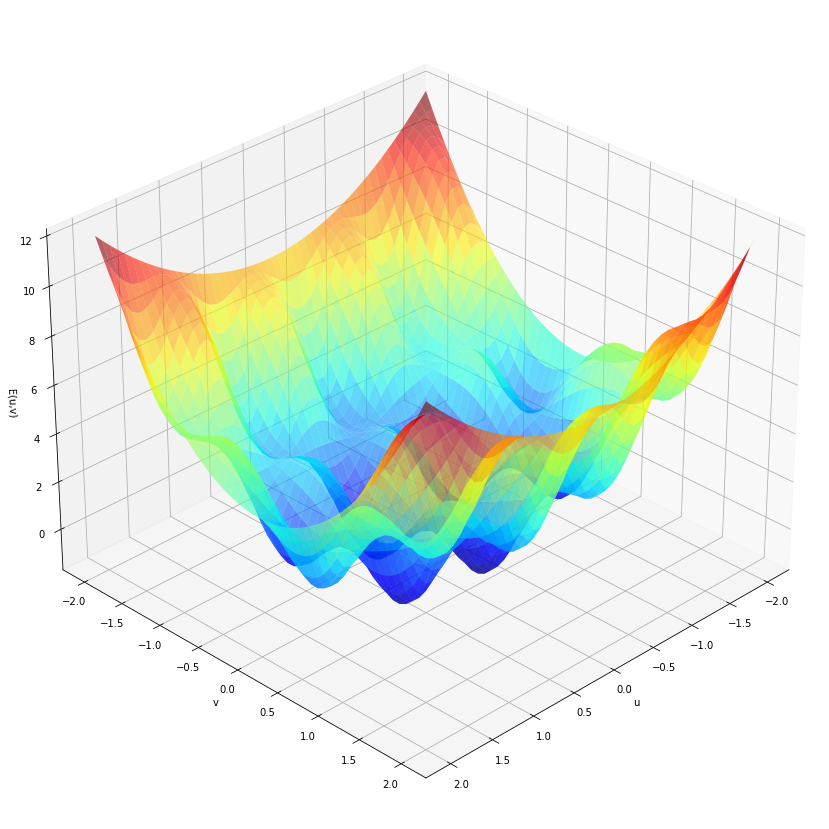

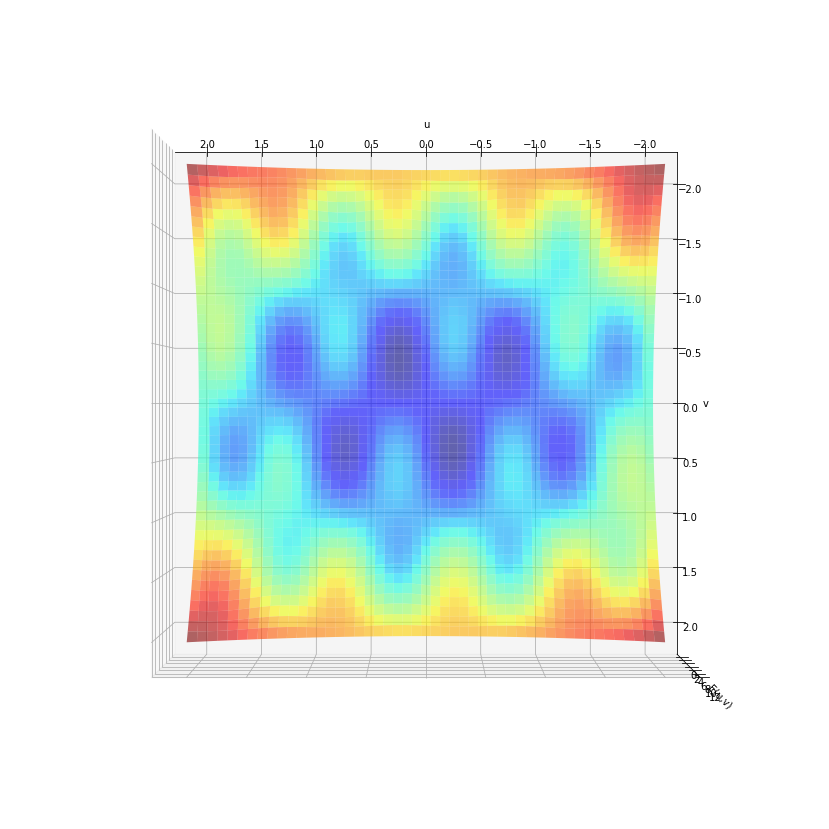

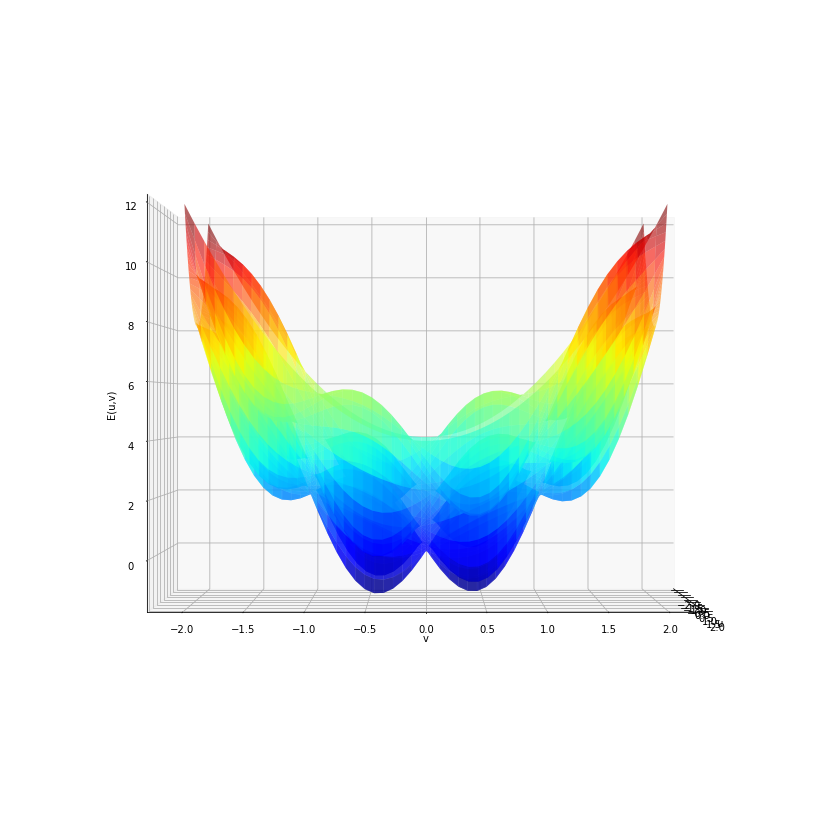

In [ ]:
def E(w):
    u = w[0]
    v = w[1]
    return u**2 + 2*v**2 + 2*np.sin(2*np.pi*u)*np.sin(np.pi*v)

display_figure(2, E, [],  [45,30], 'jet', [])
display_figure(2, E, [],  [90,90], 'jet', [])
display_figure(2, E, [],  [0,0], 'jet', [])
    
# Derivada parcial de E respecto de u
def Eu(w):
    u = w[0]
    v = w[1]
    return 4*np.pi*np.sin(np.pi*v)*np.cos(2*np.pi*u)+2*u

# Derivada parcial de E respecto de v
def Ev(w):
    u = w[0]
    v = w[1]
    return 2*np.pi*np.sin(2*np.pi*u)*np.cos(np.pi*v)+4*v
    
# Gradiente de E
def gradE(w):
    return np.array([Eu(w), Ev(w)])


Las derivadas parciales en este ejercicio son:

*   E_u = $4\cdot\pi\cdot\sin(\pi\cdot v)\cdot\cos(2\cdot\pi\cdot u)+2\cdot u$
*   E_v = $2\cdot\pi\cdot\sin(2\cdot\pi\cdot u)\cdot\cos(\pi\cdot v)+4\cdot v$



#### <font color='blue'>b) Emplear gradiente descendente para minimizar esta función con distintos valores de learning rate ($\eta$). 
Usar como punto inicial $(-1, 1)$, tasa de aprendizaje $\eta = 0.01$ y un máximo de $100$ iteraciones. Generar un gráfico 2D que muestre cómo desciende el valor de la función (eje $Y$) con las iteraciones (eje $X$). </font>



Grafica con learning rate igual a 0.01
w = [-1.21775622  0.41341212]
fun(w) = -0.06230891024214413


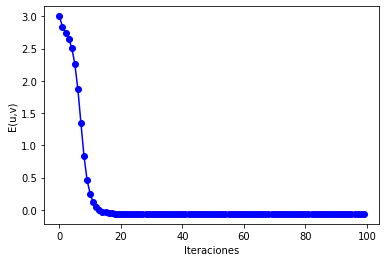

In [ ]:
'''
Nueva versión del gradiente descendente en donde no se usa un epsilon como termination criterion.
En esta ocasión, el algoritmo se ejecuta siempre por un número máximo determinado de iteraciones. 
Junto con ello, se guardan los valores de la función en cada iteración del algoritmo. Y, finalmente, 
realiza la visualización de dichos valores en 2D. 

El alumnado, si lo prefiere, puede implementar una única función de descenso de gradiente que, 
dados los parámetros adecuados, realice esta visualización directamente. Es decir, no es obligatorio
implementar dos funciones de descenso de gradiente. 
'''
def gd_grafica(w, lr, grad_fun, fun, max_iters = 100):
    graf = [fun(w)]
    for k in range(1,max_iters):
        w = w-lr*grad_fun(w)
        graf.append(fun(w))
    print('w =', w)    
    print('fun(w) =', fun(w))
    plt.figure()
    plt.plot(range(0,max_iters), graf, '-bo')
    plt.xlabel('Iteraciones')
    plt.ylabel('E(u,v)')
    plt.show()   

print ('\nGrafica con learning rate igual a 0.01')
gd_grafica(np.array([-1.0,1.0]) , 0.01, gradE, E)


Podemos observar que en las primeras iteraciones se van encontrando mínimos mucho mejores y se dan saltos grandes, como explicabamos antes que ocurría con la $lr$ cuando calculamos el gradiente descendente. Cuando nos acercamos al mínimo local vemos que ya no se mejora tanto según avanzan las iteraciones y los saltos son menores.

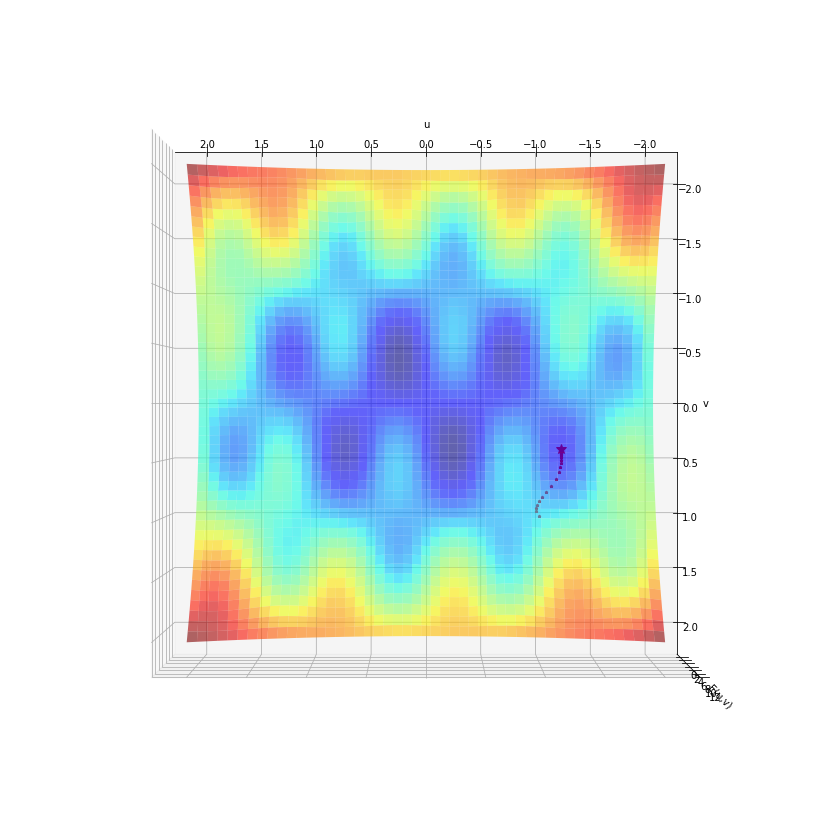

[-1.21775622  0.41341212]
-0.062308910242144355


In [ ]:
w, k, ws = gd(np.array([-1.0,1.0]), 0.01, gradE, E, float('-inf'), max_iters = 100, show_evol = False)
ws = np.array(ws, dtype=float) #Convertimos ws en un np array de floats para poder pintarlo con display_figure()
display_figure(2, E, ws, [90,90], 'jet','')
print(w) #Visionar resultados
print(E(w))

Aquí podemos ver como se va acercando la función al mínimo local de la función y como a más cerca de este está mas puntos hay, lo cual encaja con la gráfica anterior donde da saltos más pequeños según se acercaba al óptimo.

También podemos observar que este algoritmo es local, es decir, según el punto inicial que escojamos se encontrará un mínimo u otro, pero este no tiene que ser el mínimo absoluto, en la función del ejercicio anterior daba la casualidad de que si se encontraba, pero en esta se pueden observar zonas de la función más oscuras(puntos más óptimos que el encontrado).

<font color='blue'>Repetir el experimento pero usando $\eta = 0.1$, comentar las diferencias y su dependencia de $\eta$.</font>


Grafica con learning rate igual a 0.1
w = [-1.20027813  0.53868178]
fun(w) = 0.13186911245950528


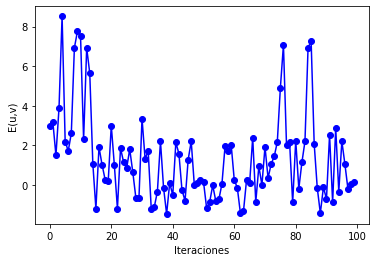

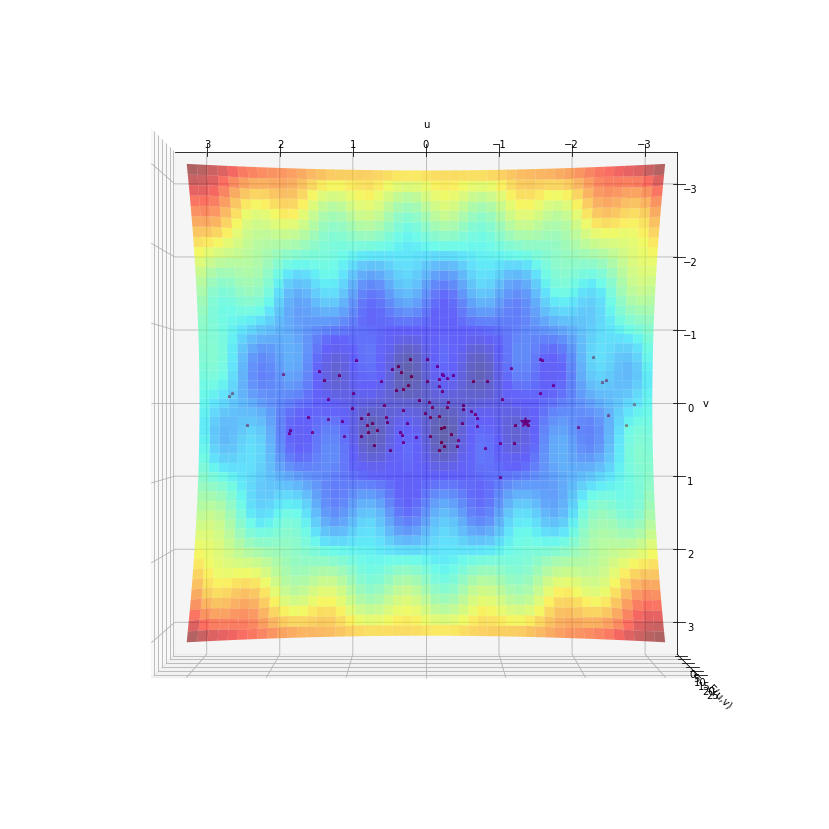

In [ ]:
print ('\nGrafica con learning rate igual a 0.1')
gd_grafica(np.array([-1.0,1.0]) , 0.1, gradE, E)

w, k, ws = gd(np.array([-1.0,1.0]), 0.1, gradE, E, float('-inf'), max_iters = 100, show_evol = False)
ws = np.array(ws, dtype=float)
display_figure(3, E, ws, [90,90], 'jet','')

En este caso como $lr$ es muy grande, $0.1 > 0.01$, el algoritmo no converge y salta de un valle de la función a otro y resultando en la nube de puntos sin sentido que tenemos. Es por esto que elegir un $lr$ no muy grande es tan importante, como he mencionado antes también es importante que no sea muy pequeño ya que entonces los saltos son muy pequeños y se tarda mucho.

### <font color='blue'>(2 puntos) Influencia del punto inicial y del learning rate. 

Considérese ahora la función $E(u,v) = -cos(u) \cdot cos(v) \cdot e^{(-((u \cdot \pi)^2 + (u + \pi)^2))}$. Calcular analíticamente y mostrar la expresión del gradiente de la función $E(u, v)$.</font>




In [ ]:
np.random.seed(1)

def E(w): 
    u = w[0]
    v = w[1]
    return -np.cos(u)*np.cos(v)*np.e**(-((u*np.pi)**2+(u+np.pi)**2))
             
# Derivada parcial de E respecto de u
def Eu(w):
    u = w[0]
    v = w[1]
    return np.cos(v)*np.e**(-((u*np.pi)**2+(u+np.pi)**2))*(np.sin(u)+((2*np.pi**2+2)*u+2*np.pi)*np.cos(u))

# Derivada parcial de E respecto de v
def Ev(w):
    u = w[0]
    v = w[1]
    return np.e**(-((u*np.pi)**2+(u+np.pi)**2))*np.cos(u)*np.sin(v)
    
# Gradiente de E
def gradE(w):
    return np.array([Eu(w), Ev(w)])

display_figure(5, E, [], [45,30], 'plasma','')
display_figure(5, E, [], [90,90], 'plasma','')
display_figure(5, E, [], [0,0], 'plasma','')
display_figure(5, E, [], [90,5], 'plasma','')

Las derivadas parciales en este ejercicio son:

*   E_u = $\cos(v)\cdot e^{(-((u \cdot \pi)^2 + (u + \pi)^2))}\cdot (\sin(u)+((2\cdot\pi^2+2)\cdot u+2\cdot\pi)\cdot\cos(u))$
*   E_v = $e^{(-((u \cdot \pi)^2 + (u + \pi)^2))}\cdot\cos(u)\cdot\sin(v)$

<font color='blue'>Úsese el gradiente descendente para encontrar un mínimo de esta función, comenzando desde los siguientes puntos iniciales: $(-4.0, 4.0), (-0.2,-3.0), (0.4,0.0), (-0.25,-2.0)$, usando dos tasas de aprendizaje ($0.1$ y $0.01$), y un número máximo de iteraciones de $250.000$. Debe mostrarse una tabla que asocie puntos iniciales y tasas de aprendizaje con las coordenadas alcanzadas y el valor de la función en dichos puntos finales. </font>

In [ ]:
w1, k, ws = gd(np.array([-4.0,4.0]), 0.1, gradE, E, float('-inf'), max_iters=250000, show_evol = False)
print('--- Coordenada inicial [-4.0,4.0] ---')
print('Learning rate 0.1')
print('Coordenadas obtenidas: (', w1[0], ', ', w1[1],')')
print('Valor alcanzado: ', E(w1))

--- Coordenada inicial [-4.0,4.0] ---
Learning rate 0.1
Coordenadas obtenidas: ( -4.0 ,  4.0 )
Valor alcanzado:  -5.365754088440198e-70


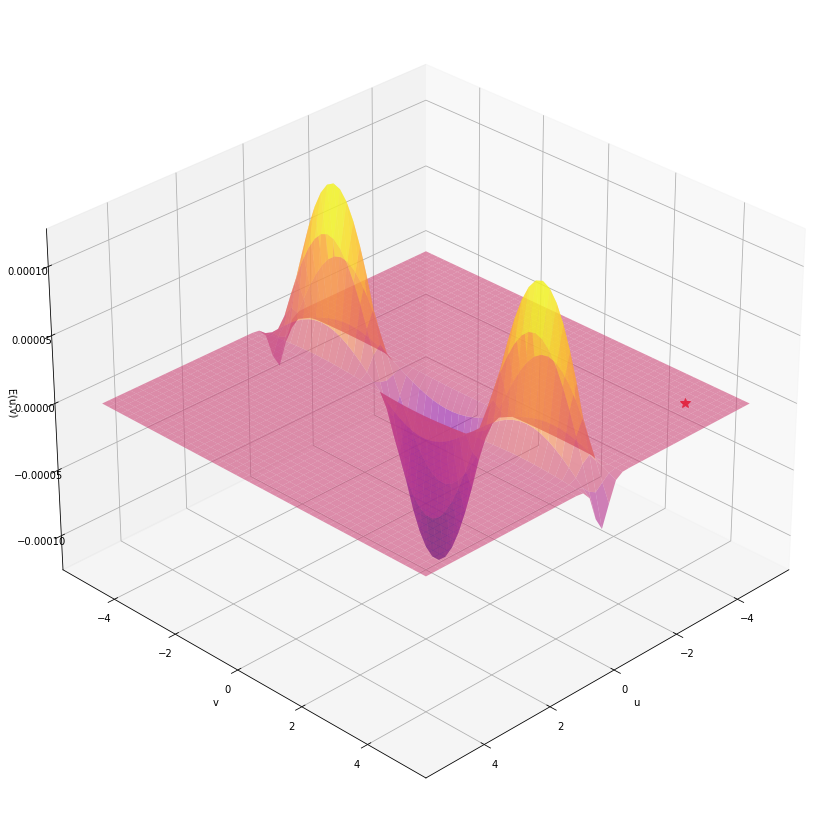

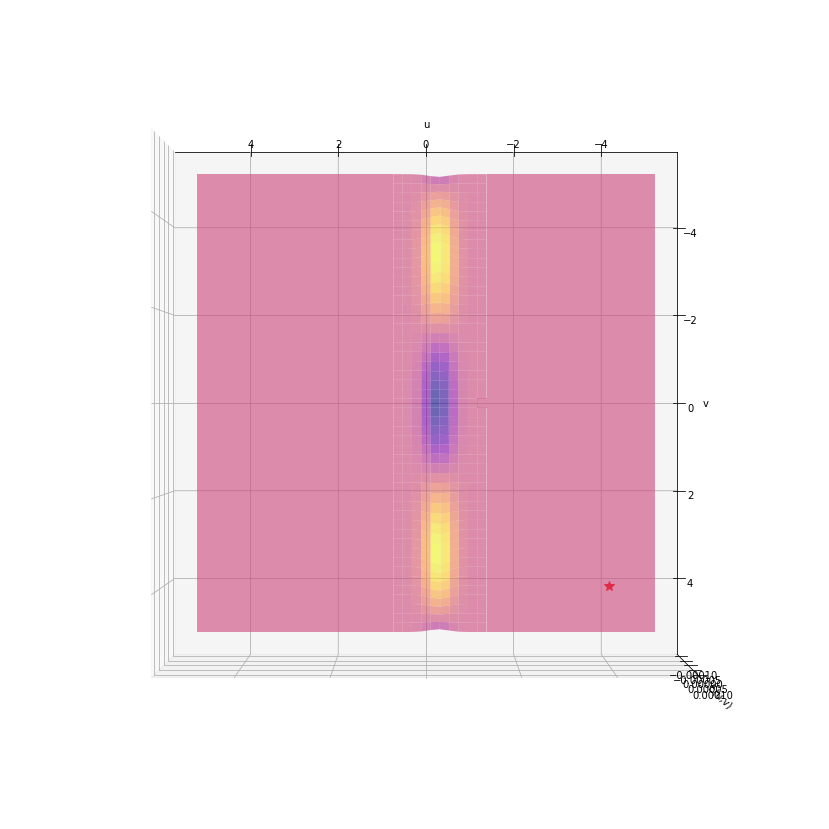

In [ ]:
ws = np.array(ws, dtype=float)

display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')

--- Coordenada inicial [-4.0,4.0] ---
Learning rate 0.01
Coordenadas obtenidas: ( -4.0 ,  4.0 )
Valor alcanzado:  -5.365754088440198e-70


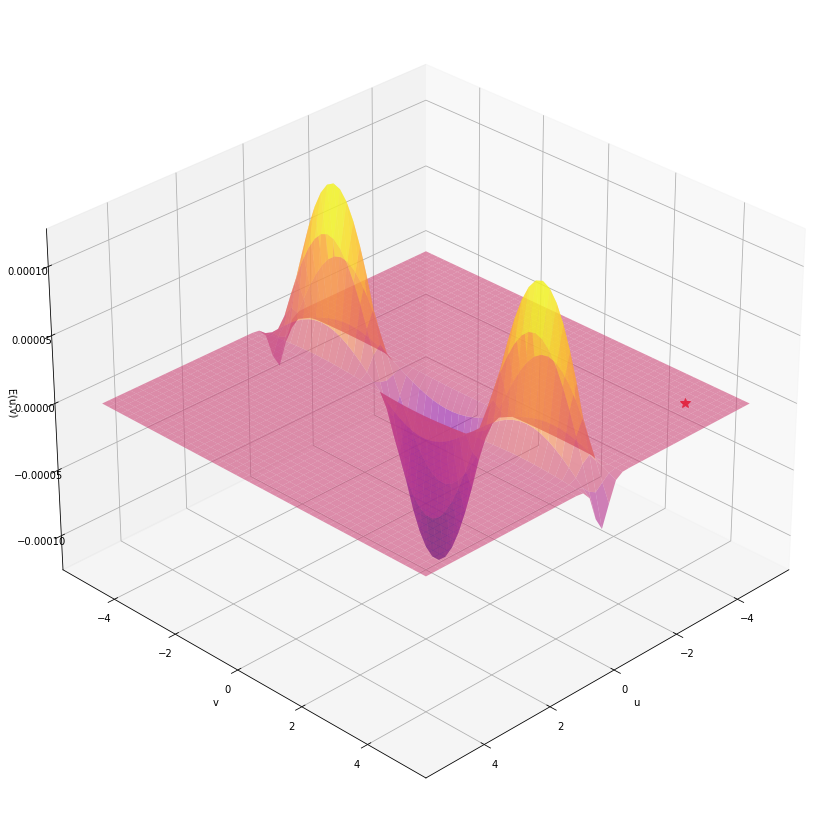

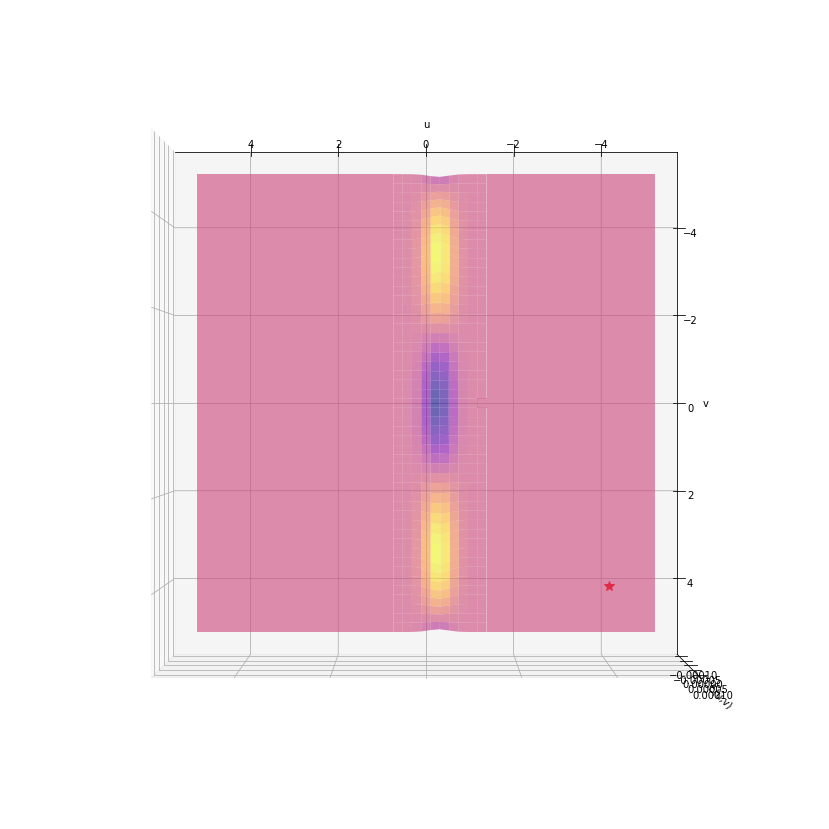

In [ ]:
w1_2, k, ws = gd(np.array([-4.0,4.0]), 0.01, gradE, E, float('-inf'), max_iters=250000, show_evol = False)
print('--- Coordenada inicial [-4.0,4.0] ---')
print('Learning rate 0.01')
print('Coordenadas obtenidas: (', w1_2[0], ', ', w1_2[1],')')
print('Valor alcanzado: ', E(w1_2))

ws = np.array(ws, dtype=float)

display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')

--- Coordenada inicial [-0.2,-3.0] ---
Learning rate 0.01
Coordenadas obtenidas: ( 0.25855859408442117 ,  -2.9872406813812833 )
Valor alcanzado:  4.706330440792832e-06


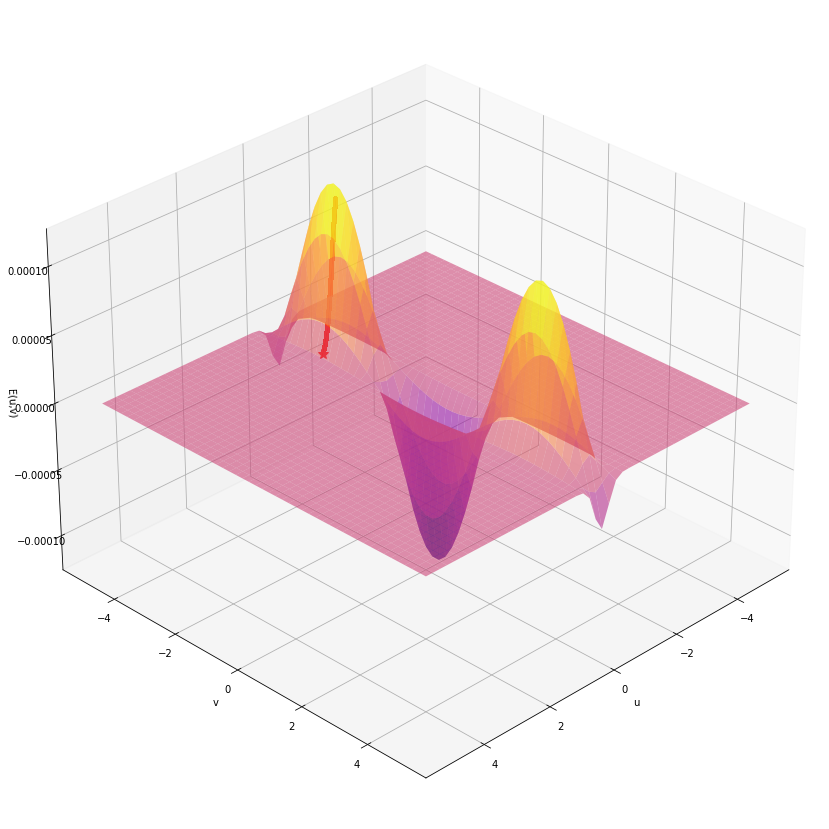

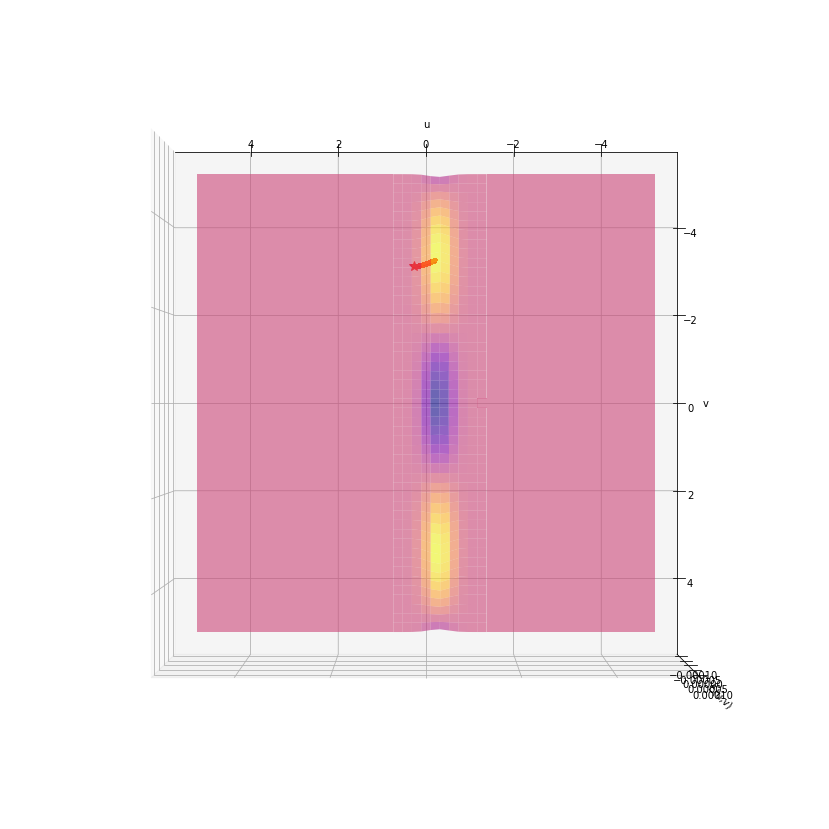

In [ ]:
w2, k, ws = gd(np.array([-0.2,-3.0]), 0.01, gradE, E, float('-inf'), max_iters=250000, show_evol = False)
print('--- Coordenada inicial [-0.2,-3.0] ---')
print('Learning rate 0.01')
print('Coordenadas obtenidas: (', w2[0], ', ', w2[1],')')
print('Valor alcanzado: ', E(w2))

ws = np.array(ws, dtype=float)

display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')

--- Coordenada inicial [-0.2,-3.0] ---
Learning rate 0.1
Coordenadas obtenidas: ( 0.48440772507679136 ,  -2.9848134533117094 )
Valor alcanzado:  1.6815941913131285e-07


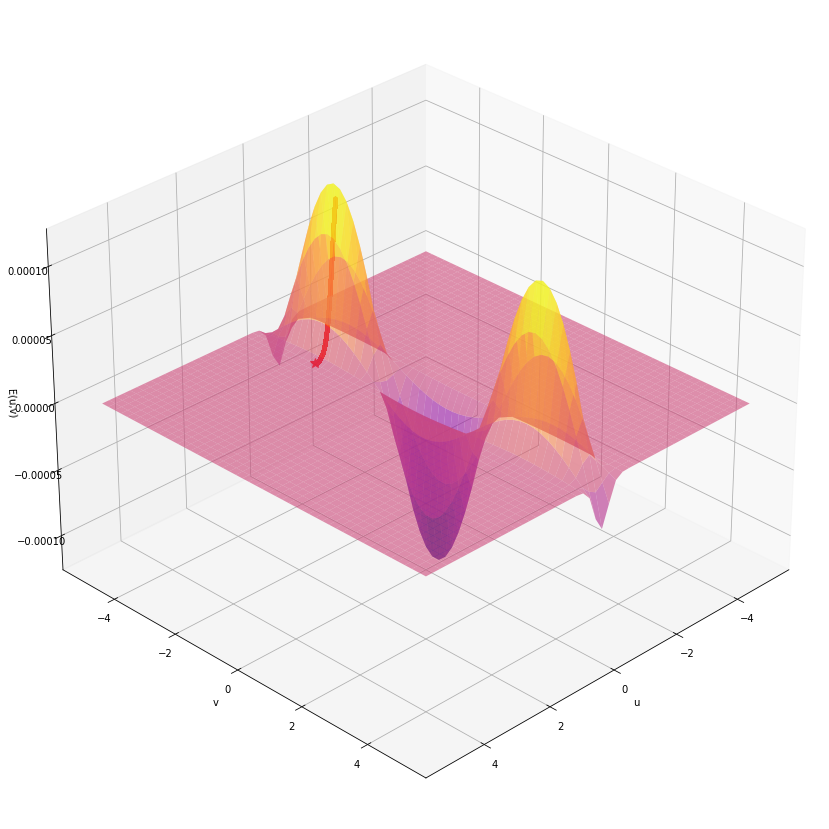

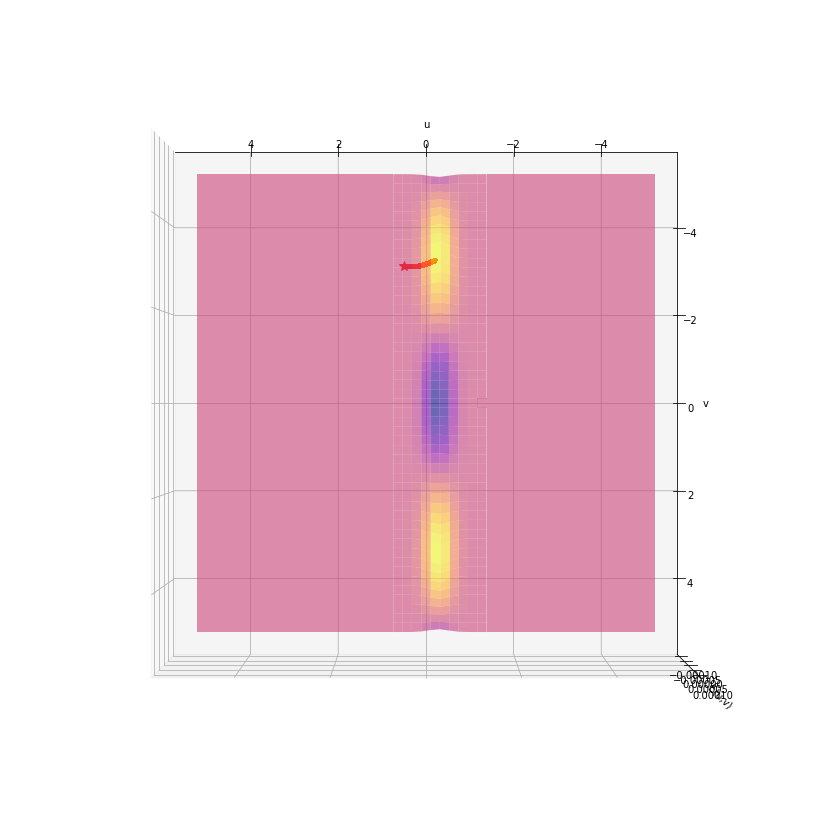

In [ ]:
w2_2, k, ws = gd(np.array([-0.2,-3.0]), 0.1, gradE, E, float('-inf'), max_iters=250000, show_evol = False)
print('--- Coordenada inicial [-0.2,-3.0] ---')
print('Learning rate 0.1')
print('Coordenadas obtenidas: (', w2_2[0], ', ', w2_2[1],')')
print('Valor alcanzado: ', E(w2_2))

ws = np.array(ws, dtype=float)

display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')

--- Coordenada inicial [0.4,0.0] ---
Learning rate 0.01
Coordenadas obtenidas: ( 0.36772519037227136 ,  0.0 )
Valor alcanzado:  -1.101222630145693e-06


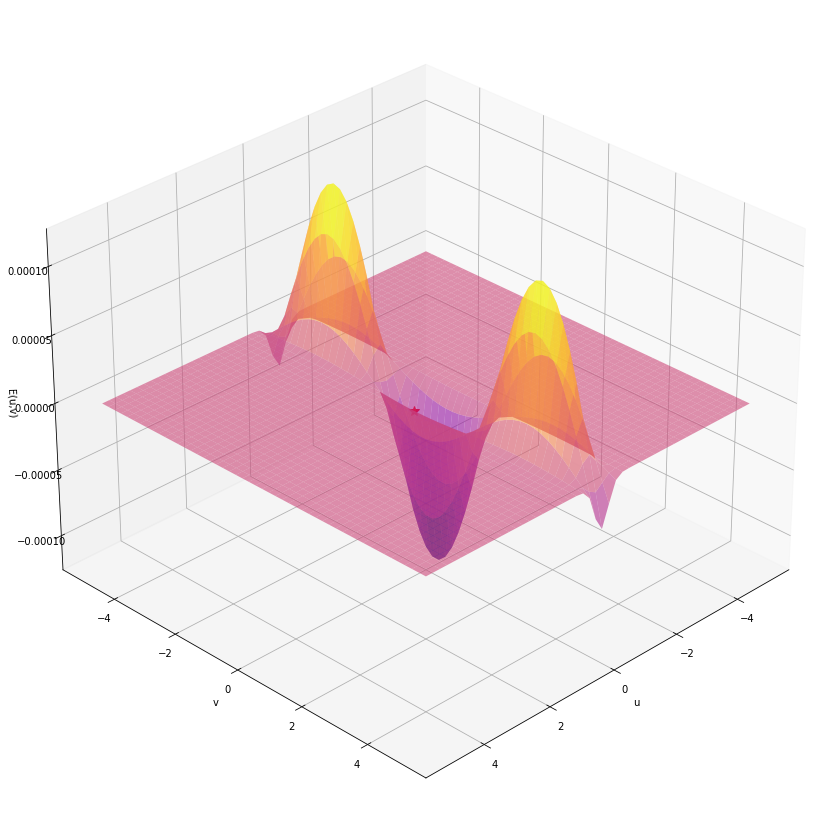

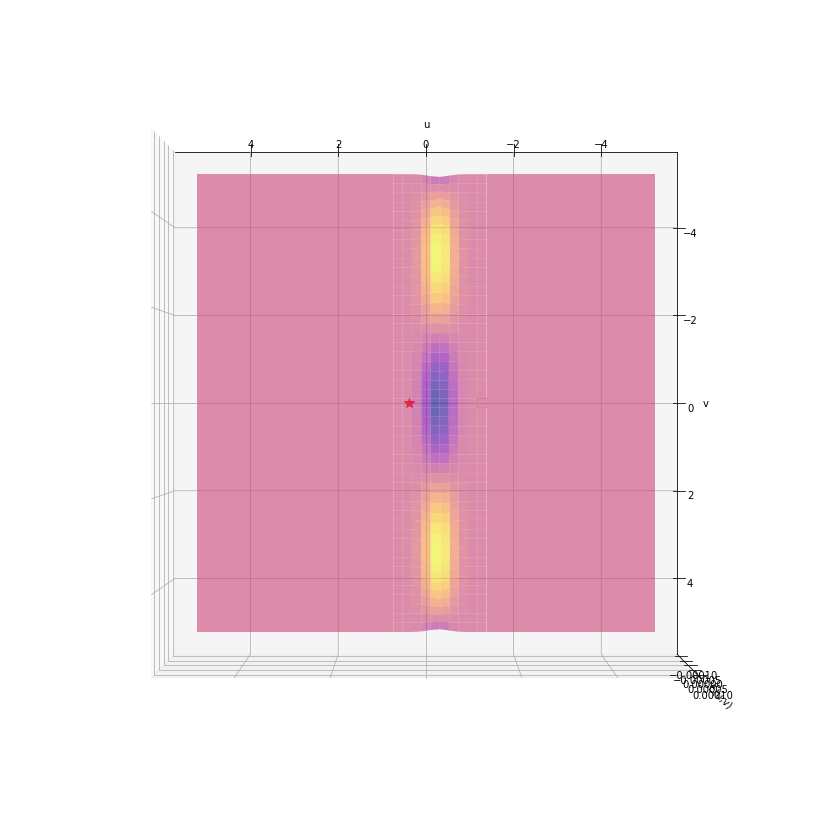

In [ ]:
w3, k, ws = gd(np.array([0.4,0.0]), 0.01, gradE, E, float('-inf'), max_iters=250000, show_evol = False)
print('--- Coordenada inicial [0.4,0.0] ---')
print('Learning rate 0.01')
print('Coordenadas obtenidas: (', w3[0], ', ', w3[1],')')
print('Valor alcanzado: ', E(w3))

ws = np.array(ws, dtype=float)

display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')

--- Coordenada inicial [0.4,0.0] ---
Learning rate 0.1
Coordenadas obtenidas: ( -0.2759971580994142 ,  0.0 )
Valor alcanzado:  -0.00012315955326547075


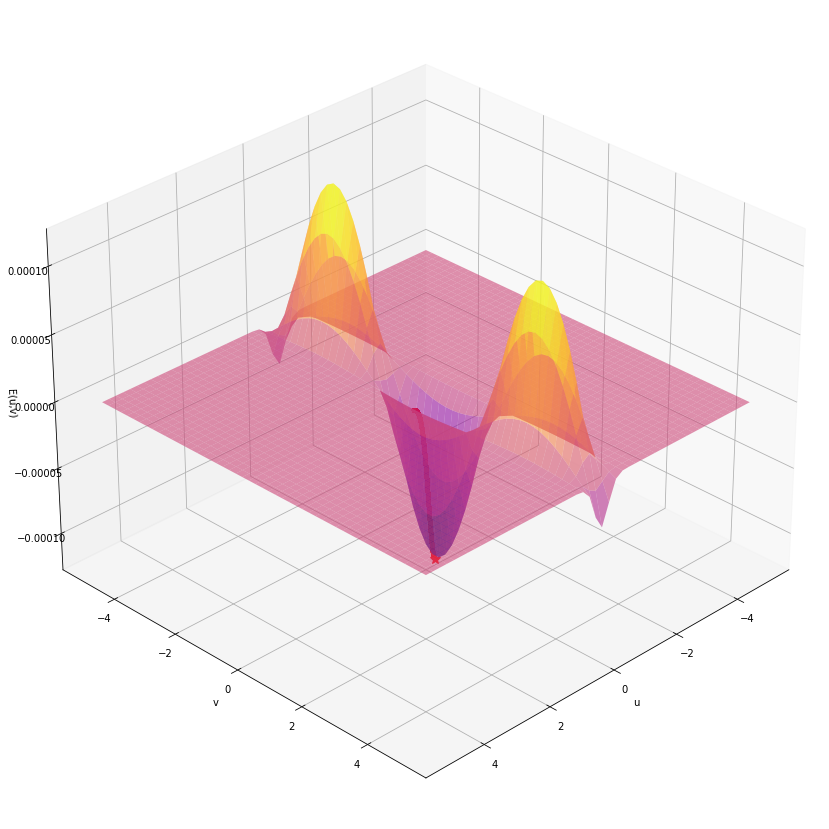

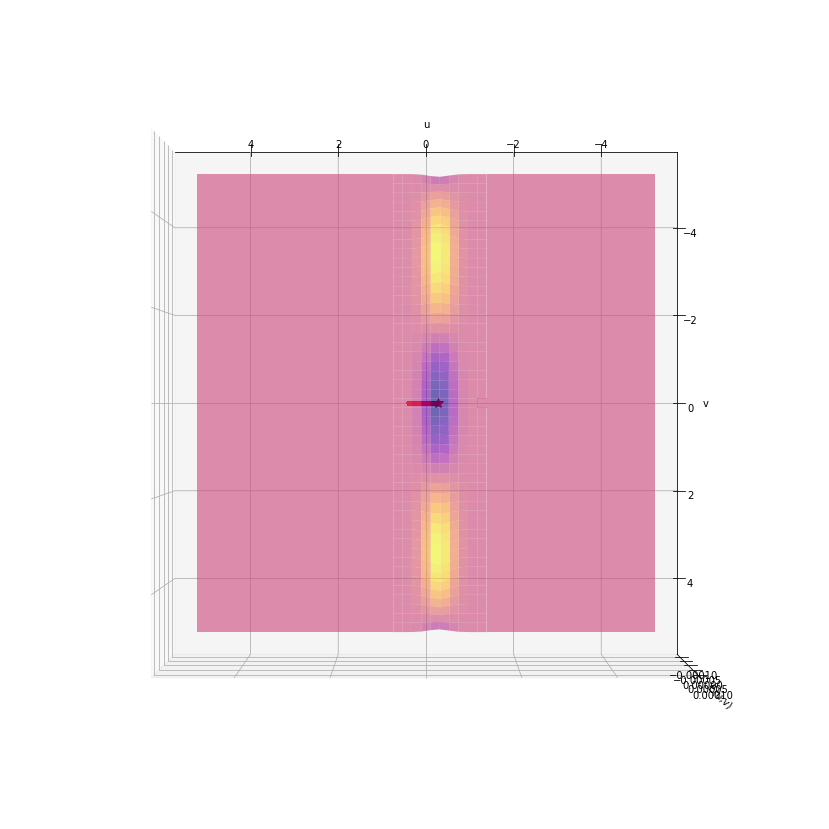

In [ ]:
w3_2, k, ws = gd(np.array([0.4,0.0]), 0.1, gradE, E, float('-inf'), max_iters=250000, show_evol = False)
print('--- Coordenada inicial [0.4,0.0] ---')
print('Learning rate 0.1')
print('Coordenadas obtenidas: (', w3_2[0], ', ', w3_2[1],')')
print('Valor alcanzado: ', E(w3_2))

ws = np.array(ws, dtype=float)

display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')

--- Coordenada inicial [-0.25, -2.0] ---
Learning rate 0.01
Coordenadas obtenidas: ( -0.11016895288557774 ,  -1.7366086968952288 )
Valor alcanzado:  1.4859296816314177e-05


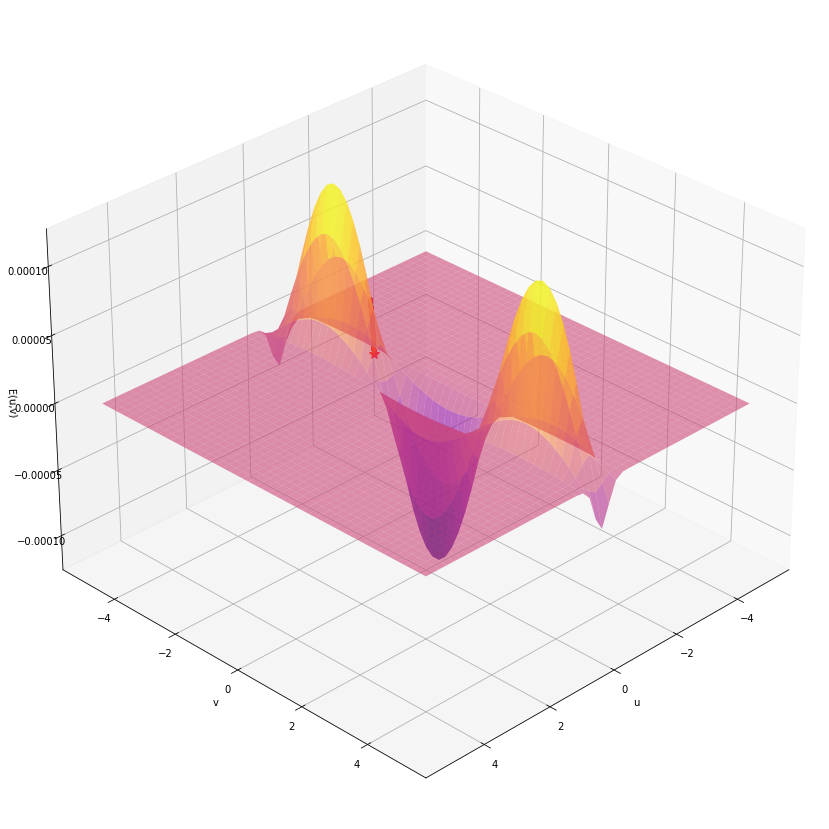

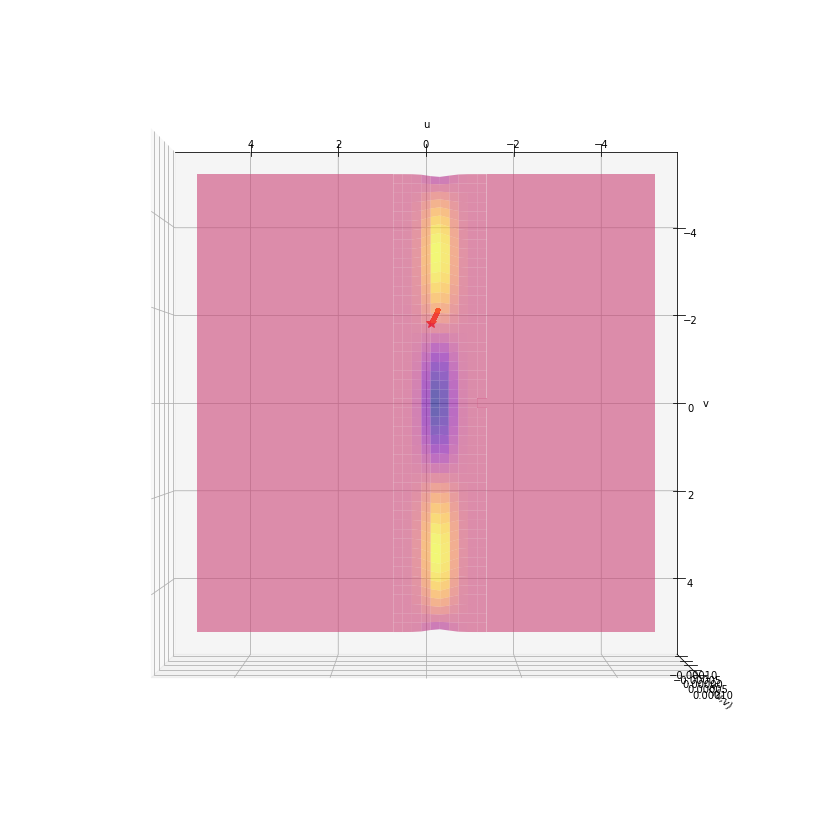

In [ ]:
w4, k, ws = gd(np.array([-0.25, -2.0]), 0.01, gradE, E, float('-inf'), max_iters=250000, show_evol = False)
print('--- Coordenada inicial [-0.25, -2.0] ---')
print('Learning rate 0.01')
print('Coordenadas obtenidas: (', w4[0], ', ', w4[1],')')
print('Valor alcanzado: ', E(w4))

ws = np.array(ws, dtype=float)

display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')

--- Coordenada inicial [-0.25, -2.0] ---
Learning rate 0.1
Coordenadas obtenidas: ( -0.27599715809941244 ,  -0.18770102182448975 )
Valor alcanzado:  -0.00012099635696428707


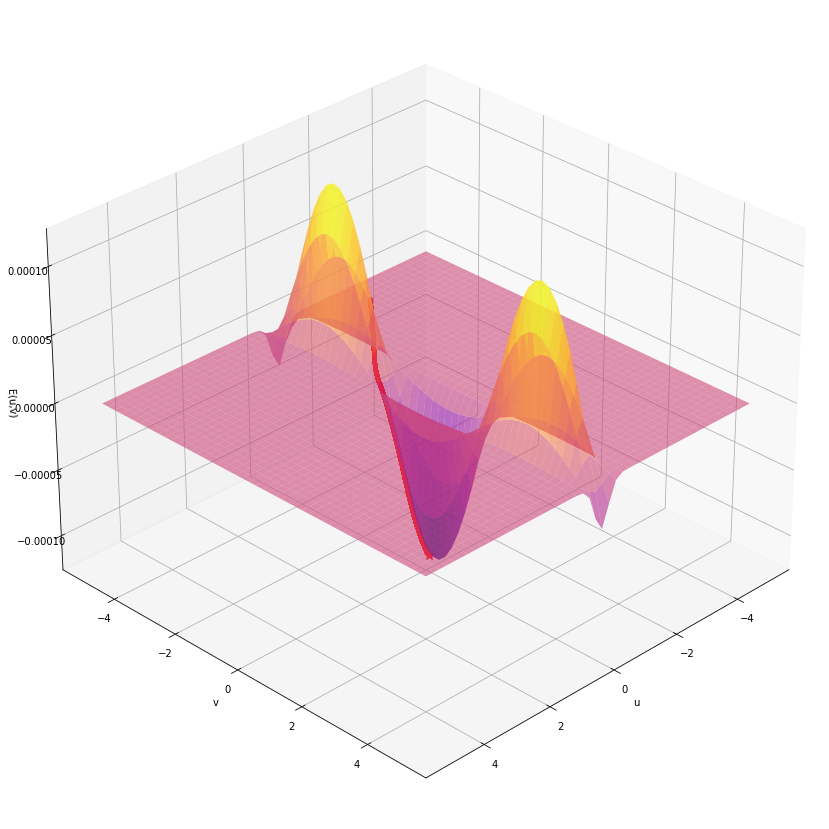

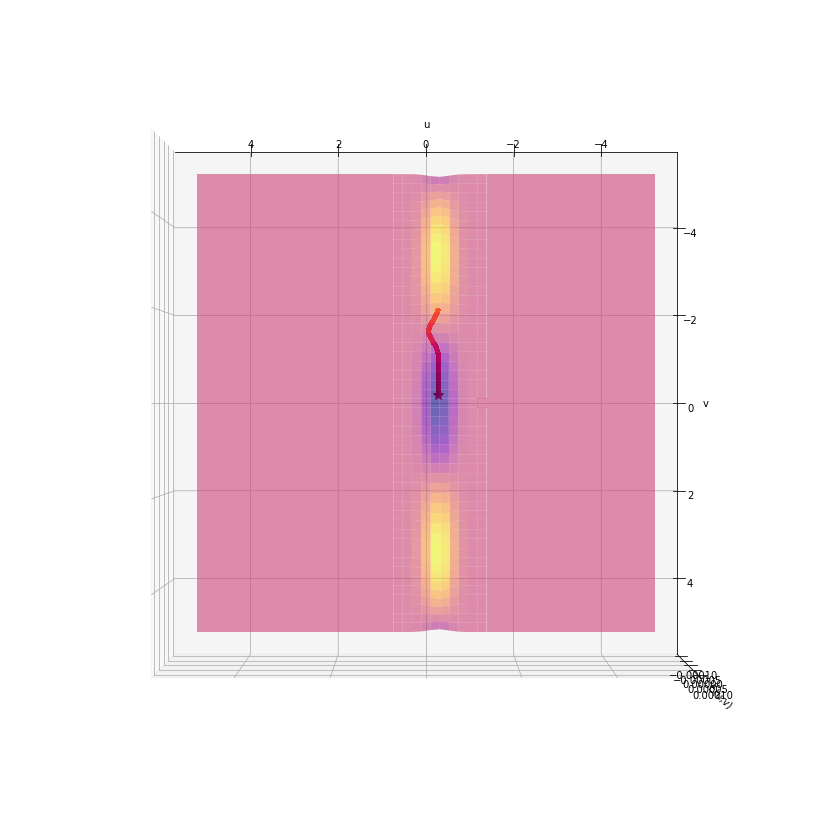

In [ ]:
w4_2, k, ws = gd(np.array([-0.25, -2.0]), 0.1, gradE, E, float('-inf'), max_iters=250000, show_evol = False)
print('--- Coordenada inicial [-0.25, -2.0] ---')
print('Learning rate 0.1')
print('Coordenadas obtenidas: (', w4_2[0], ', ', w4_2[1],')')
print('Valor alcanzado: ', E(w4_2))

ws = np.array(ws, dtype=float)

display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')

In [ ]:
data = {'0.01': [[np.round(w1.astype(float), 2), np.round(E(w1.astype(float)), 5)], [np.round(w2.astype(float), 2), np.round(E(w2.astype(float)), 5)], [np.round(w3.astype(float), 2), np.round(E(w3.astype(float)), 5)], [np.round(w4.astype(float), 2), np.round(E(w4.astype(float)), 5)]],
        '0.1':  [[np.round(w1_2.astype(float), 2), np.round(E(w1_2.astype(float)), 5)], [np.round(w2_2.astype(float), 2), np.round(E(w2_2.astype(float)), 5)], [np.round(w3_2.astype(float), 2), np.round(E(w3_2.astype(float)), 5)], [np.round(w4_2.astype(float), 2), np.round(E(w4_2.astype(float)), 5)]]}

tabla = pd.DataFrame(data)
nuevo_indice = [[-4.0, 4.0], [-0.2, -3.0], [0.4, 0.0], [-0.25, -2.0]]
tabla.index = pd.MultiIndex.from_tuples(nuevo_indice)

print(tabla)

                               0.01                         0.1
-4.00  4.0      [[-4.0, 4.0], -0.0]         [[-4.0, 4.0], -0.0]
-0.20 -3.0     [[0.26, -2.99], 0.0]        [[0.48, -2.98], 0.0]
 0.40  0.0      [[0.37, 0.0], -0.0]    [[-0.28, 0.0], -0.00012]
-0.25 -2.0  [[-0.11, -1.74], 1e-05]  [[-0.28, -0.19], -0.00012]


Tras obtener los siguientes datos podemos llegar a las sigientes conclusiones:

*   Para el punto inicial $[-4.0, 4.0]$ al estar situado en una zona de la función que es llana el algoritmo de gradiente descendiente simplemente no encuentra pendientes descendentes, por lo que para ambas $lr$ alcanza el mínimo 0, este es un ejemplo de una de las limitaciones de este algorítmo, es una búsquedad local y por tanto el punto inicial se debe de elegir a conciencia.
*   Para el punto inicial $[-0.2, -3.0]$ vemos que este si está mejor situado y el algoritmo si que encuentra pendientes, el problema es que en este caso lo que encuentra es un mínimo relativo, y no el absoluto. Por lo que vuelve a fallar el punto inicial escogido.
*   Para el punto inicial $[0.4, 0.0]$, este se encuentra en una zona buena, pero en cuanto al $lr$ de 0.01 vemos que tiene un valor demasiado pequeño y no es siquiera capaz de moverse por las pendientes de la función (acaba en el punto $[0.37, 0.0]$, el cual está muy cerca del punto inicial), en cambio para 0.1 vemos que ahora sí el tamaño de los saltos es bueno y se consigue alcanzar el óptimo. Con este ejemplo vemos que no siempre es bueno darle valores pequeños a $lr$, que no siempre funcionan mejor que valores más grandes.
*   El último punto inicial, $[-0.25, -2.0]$, situado también en una buena zona con pendientes próximas como los dos anteriores vemos que ocurre algo similar que en el anterior caso, para 0.01 consigue moverse un poco, pero al llegar a la zona donde la altura pasa a ser negativa no consigue avanzar más, esto ocurre con el tercer punto donde se ve que el punto inicial como tal ya está en esa zona donde no se puede avanzar dando saltos tan pequeños(queda atrapado en un mínimo local). Con 0.1 vemos que también pasa como en el caso anterior y se consigue alcanzar el óptimo.





### <font color='blue'>(1 punto) ¿Cuál sería su conclusión sobre la verdadera dificultad de encontrar el mínimo global de una función arbitraria?</font>

Tras hacer todas las pruebas anteriores con el algoritmo de gradiente descendiente se pueden sacar las siguientes conclusiones ya expuestas en la anterior celda y resumir que estas son las verdaderas dificultades a la hora de encontrar el mínimo global de una función arbitraria:

*   **Valor inicial:** Es conveniente visionar primero la gráfica para elegir un valor inicial óptimo, esto quiere decir que tenga cerca pendientes descendentes, como hemos visto antes si se empieza en una zona plana es imposible alcanzar el óptimo.
*   **learning rate:** Elegir un valor adecuado para esta variable supone un problema mucho mayor que la elección del valor inicial, ya que aquí no hay visionado de la gráfica que valga, investigando un poco he visto que esta se puede calcular/aproximar con distintos métodos que imagino veremos a lo largo de la asignatura.

Por lo que para mi la verdadera dificultad a la hora de encontrar el mínimo global reside en elegir un valor para learning rate adecuado, o lo que es lo mismo regular adecuadamente el tamaño de los saltos en la búsqueda.





## <font color='blue'>Ejercicio 2: REGRESIÓN LINEAL (5.5 puntos) </font>

### <font color='blue'>(2.5 puntos) Este ejercicio ajusta modelos de regresión a vectores de características extraídos a partir de imágenes de dígitos manuscritos. 

<font color='blue'>En particular, se extraen dos características concretas que miden el valor medio del nivel de gris y la simetría del dígito respecto de su eje vertical. Solo se seleccionarán para este ejercicio las imágenes de los números $1$ y $5$. </font>

<font color='blue'>Estimar un modelo de regresión lineal, a partir de los datos proporcionados por
los vectores de características dados, usando tanto el algoritmo
de la pseudo-inversa como el gradiente descendente estocástico (SGD). La pseudo-inversa debe ser calculada por medio de la descomposición en valores singulares vista en teoría (esto es, debe emplearse la función `np.linalg.svd()`). Las etiquetas serán
$\{-1,1\}$, una para cada uno de los números. Se deben dibujar las soluciones obtenidas
junto con los datos usados en el ajuste (tanto con los datos de entrenamiento como con los de test). Valorar la bondad del resultado usando $E_{in}$ y
$E_{out}$ (para $E_{out}$ calcular las predicciones usando los datos del fichero de test). Debe incluirse también el porcentaje de acierto en clasificación, tanto para los datos de entrenamiento como para los de test. </font>


In [ ]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta datos (que contiene X_train.npy, y_train.npy, X_test.npy y y_test.npy) 
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Mounted at /content/drive


In [ ]:
# Funcion para leer los datos
def readData(file_x, file_y, class1, class2, label_class1, label_class2):
    # Leemos los ficheros    
    datax = np.load(file_x)
    datay = np.load(file_y)
    y = []
    x = []    
    # Solo guardamos los datos de las dos clases que nos interesan
    for i in range(0,datay.size):
        if datay[i] == class1 or datay[i] == class2:
            if datay[i] == class1:
                y.append(label_class1)
            else:
                y.append(label_class2)
            x.append(np.array([1, datax[i][0], datax[i][1]]))
            
    x = np.array(x, np.float64)
    y = np.array(y, np.float64)
    
    return x, y

In [12]:
# Funcion para calcular el error
def MSE(x,y,w):
    return (1/y.size)*np.linalg.norm(x.dot(w)-y)**2

In [13]:
# Calculo del gradiente del MSE
# w = los pesos
# x = los vectores de características del minibatch
# y = el vector de etiquetas del minibatch
def gradMSE(w,x,y):
  sum = np.sum( (x.T*(np.dot(x, w)-y)).T,axis=0)
  sum = sum * (2/np.shape(x)[0])  
  return sum

In [11]:
# Error de clasificación para la recta y = w0 + w1*x1 + w2*x2
# w = los pesos
# x = los vectores de características del test
# y = el vector de etiquetas del test
def clasifError(w,x,y):
  predicted_y = x.dot(w)

  fallos = 0
  tam_y = int(y.shape[0])

  for i in range(tam_y):
    if predicted_y[i] < 0 and y[i] == 1: # Clasifica un 5 como 1
      fallos = fallos+1
    elif predicted_y[i] >= 0 and y[i] == -1: # Clasifica un 1 como 5
      fallos = fallos+1

  return fallos, (fallos/tam_y)*100

In [ ]:
class1 = 5 #dígito 5
class2 = 1 #dígito 1
label1 = 1 #etiqueta empleada para representar class1
label2 = -1 #etiqueta empleada para representar class2
# Lectura de los datos de entrenamiento 
x, y = readData('drive/MyDrive/Colab Notebooks/datos/X_train.npy', 
                'drive/MyDrive/Colab Notebooks/datos/y_train.npy', class1, class2, label1, label2)
# Lectura de los datos para el test
x_test, y_test = readData('drive/MyDrive/Colab Notebooks/datos/X_test.npy', 
                          'drive/MyDrive/Colab Notebooks/datos/y_test.npy', class1, class2, label1, label2)

In [10]:
# Gradiente Descendente Estocastico
np.random.seed(1)
def sgd(x, y, lr, max_iters, tam_minibatch, show_evol = False):
    w = np.array([0.0, 0.0, 0.0])

    it = 0;

    #Creamos el minibatch
    x_y = np.hstack((x, y.reshape(-1, 1)))

    permutation = np.random.permutation(x_y.shape[0])
    x_y = x_y[permutation]

    num_minibatch = x_y.shape[0]/tam_minibatch
    list_minibatch = np.array_split(x_y, num_minibatch)
    minibatch = list_minibatch[0]

    while it < max_iters:
      w = w - lr * gradMSE(w, x_y[:, :3], x_y[:, 3]) 
      it = it+1
       
    return w



In [ ]:
w = sgd(x, y, 0.01, 200, 32)


Error de clasificación para el algoritmo del SGD:

Numero de fallos:  7
Porcentaje de fallo:  1.650943396226415 


Bondad del resultado para el algoritmo del SGD:

Ein:  0.10419016664166958
Eout:  0.15233338981648298 



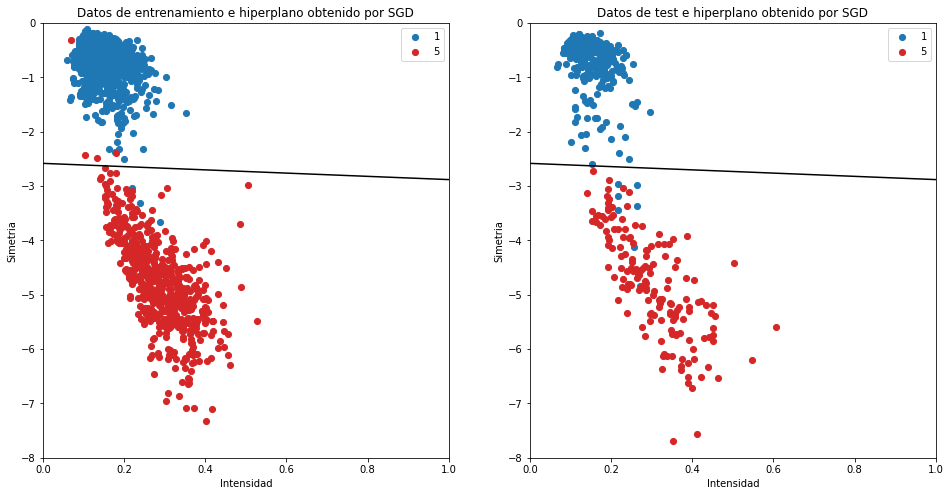

In [ ]:
# Error de clasificación
n_fallos, porc_fallos = clasifError(w,x_test,y_test)
print ('\nError de clasificación para el algoritmo del SGD:\n')
print ("Numero de fallos: ", n_fallos)
print ("Porcentaje de fallo: ", porc_fallos, '\n')

# Errores del conjunto de entrenamiento y test
print ('\nBondad del resultado para el algoritmo del SGD:\n')
print ("Ein: ", MSE(x,y,w))
print ("Eout: ", MSE(x_test, y_test, w), '\n')

# Creo unas figura 
fig = plt.figure(figsize=(16,8))

''' 
          DATOS DE ENTRENAMIENTO
'''
# Separamos los datos según su clase
x_y = np.hstack((x, y.reshape(-1, 1)))

uno = x_y[x_y[:, -1] == -1]
cinco = x_y[x_y[:, -1] == 1]

# Visualizamos los datos con un Scatter plot
uno_inten = uno[:, 1]
uno_sime = uno[:, 2]
cinco_inten = cinco[:, 1]
cinco_sime = cinco[:, 2]

ax = fig.add_subplot(1, 2, 1)

# Dibujamos los datos
ax.scatter(uno_inten, uno_sime, color='tab:blue', marker = '.', s = 150)
ax.scatter(cinco_inten, cinco_sime, color='tab:red', marker = '.', s = 150)
# Dibujamos el hiperplano
sgdX = np.linspace(0, 1, y.size)
sgdY = (-w[0] - w[1]*sgdX) / w[2]

ax.plot(sgdX, sgdY, color=(.0, .0, .0))

# Acotamos las coordenadas de la gráfica
ax.set(xlim=(0.0, 1.0), ylim=(-8, 0))

# Añadimos los títulos
ax.set_xlabel('Intensidad')
ax.set_ylabel('Simetria')
ax.set_title('Datos de entrenamiento e hiperplano obtenido por SGD')

# Añadimos la leyenda
ax.legend(('1', '5'), loc='upper right')


'''
        DATOS DE TEST
'''
# Separamos los datos según su clase
x_y = np.hstack((x_test, y_test.reshape(-1, 1)))

uno = x_y[x_y[:, -1] == -1]
cinco = x_y[x_y[:, -1] == 1]

# Visualizamos los datos con un Scatter plot
uno_inten = uno[:, 1]
uno_sime = uno[:, 2]
cinco_inten = cinco[:, 1]
cinco_sime = cinco[:, 2]

ax = fig.add_subplot(1, 2, 2)

# Dibujamos los datos
ax.scatter(uno_inten, uno_sime, color='tab:blue', marker = '.', s = 150)
ax.scatter(cinco_inten, cinco_sime, color='tab:red', marker = '.', s = 150)
# Dibujamos el hiperplano
sgdX = np.linspace(0, 1, y_test.size)
sgdY = (-w[0] - w[1]*sgdX) / w[2]

ax.plot(sgdX, sgdY, color=(.0, .0, .0))

# Acotamos las coordenadas de la gráfica
ax.set(xlim=(0.0, 1.0), ylim=(-8, 0))

# Añadimos los títulos
ax.set_xlabel('Intensidad')
ax.set_ylabel('Simetria')
ax.set_title('Datos de test e hiperplano obtenido por SGD')

# Añadimos la leyenda
ax.legend(('1', '5'), loc='upper right')

plt.show()

En este apartado usamos el gradiente estocástico descendiente para aproximar los pesos y calcular el hiperplano o frontera de decisión para ver según la simetría y la intensidad de un número dibujado si este es un 1 o un 5.

El gradiente estocástico es una técnica similar al gradiente descendiente para aproximar los pesos, solo que en el caso del estocástico no usamos todo el conjunto de datos para la aproximación, sino que usamos un conjunto reducido (minibatch), el tamaño de este minibatch suele tener un valor entre 32 y 128 como norma general para no sobreestimar la muestra, yo he elegido como tamaño 32.

Para el learning rate por la experiencia del ejercicio 1 he elegido un valor de 0.01 para que los saltos no sean demasiado grandes.

Como número de iteraciones he seguido el consejo del guión y he probado varios valores entre 250 y 500 o cercanos llegando a la conclusión de que con 200 es como se ajusta mejor la frontera.

En cuanto a los errores obtenidos, ambos similares, Ein es el error producido a la hora de aproximar nuestros pesos a los datos de entrenamiento, este es pequeño por lo que nuestros pesos están bien aproximados a los datos de entrenamiento. Eout se refiere al error a la hora de aplicar nuestros pesos con los datos de test, su valor aquí es algo mayor que el de Ein por lo que no está tan bien ajustado para estos datos, no obstante es pequeño también por lo que al final el ajuste es bueno.

Por último el error en clasificación es otra forma de ver el Eout, no son lo mismo OJO, pero nos sirve también para ver si nuestros pesos están bien ajustados para los datos de test, en este caso tenemos 7 casos mal clasificados, lo que corresponde al 1.65% de la muestra, puede ser mejor pero está bien ya que la gran mayoría de valores están bien clasificados. 

In [ ]:
# Algoritmo pseudoinversa    
def pseudoinverse(x, y):
    # Calculamos la descomposición en valores singulares (SVD) de la matriz de datos
    U, s, VT = np.linalg.svd(x)

    # Calculamos la pseudoinversa de la matriz X utilizando la fórmula X+ = V . D+ . U.T
    D = np.zeros((x.shape[0], x.shape[1]))
    D[:x.shape[1], :x.shape[1]] = np.diag(s)
    D_pinv = np.linalg.inv(D.T.dot(D)).dot(D.T)
    x_pinv = VT.T.dot(D_pinv).dot(U.T)

    # Calculamos el valor de los pesos
    w = x_pinv.dot(y)

    return w

In [ ]:
class1 = 5 #dígito 5
class2 = 1 #dígito 1
label1 = 1 #etiqueta empleada para representar class1
label2 = -1 #etiqueta empleada para representar class2
# Lectura de los datos de entrenamiento 
x, y = readData('drive/MyDrive/Colab Notebooks/datos/X_train.npy', 
                'drive/MyDrive/Colab Notebooks/datos/y_train.npy', class1, class2, label1, label2)
# Lectura de los datos para el test
x_test, y_test = readData('drive/MyDrive/Colab Notebooks/datos/X_test.npy', 
                          'drive/MyDrive/Colab Notebooks/datos/y_test.npy', class1, class2, label1, label2)

In [ ]:
w = pseudoinverse(x, y)

n_fallos, porc_fallos = clasifError(w,x_test,y_test)
print ('\nError de clasificación para el algoritmo de la pseudoinversa:\n')
print ("Numero de fallos: ", n_fallos)
print ("Porcentaje de fallo: ", porc_fallos, '\n')

print ('\nBondad del resultado para el algoritmo de la pseudoinversa:\n')
print ("Ein: ", MSE(x,y,w))
print ("Eout: ", MSE(x_test, y_test, w))


Error de clasificación para el algoritmo del SGD:

Numero de fallos:  7
Porcentaje de fallo:  1.650943396226415 


Bondad del resultado para el algoritmo de la pseudoinversa:

Ein:  0.07918658628900395
Eout:  0.13095383720052584


Para el caso de la pseudoinversa tenemos los mismo valores en el error de clasificación, es decir, clasifica mal el mismo número de valores de la muestra que SGD, sin embargo tenemos mejores valores para el Ein y Eout, esto se debe a que el MSE, función que usamos para calcular estos errores, no es la mejor función de pérdida para un problema de clasificación, ya que los ejemplos bien clasificados pero alejados de la frontera de decisión cuentan para el cálculo del error. Y como se muestra en el siguiente gráfico la inclinación de la recta calculada por la pseudoinversa permite tener los ejemplos más cerca de la misma.

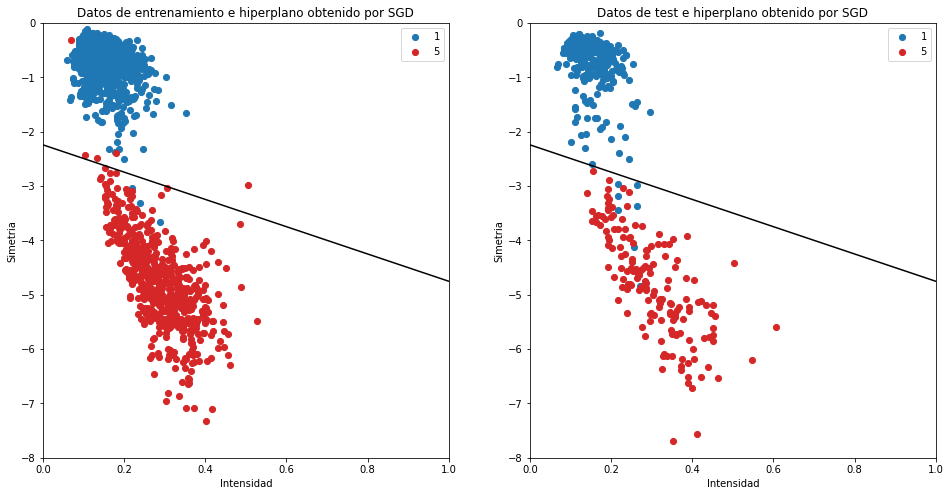

In [ ]:
# Creo unas figura 
fig = plt.figure(figsize=(16,8))

''' 
          DATOS DE ENTRENAMIENTO
'''
# Separamos los datos según su clase
x_y = np.hstack((x, y.reshape(-1, 1)))

uno = x_y[x_y[:, -1] == -1]
cinco = x_y[x_y[:, -1] == 1]

# Visualizamos los datos con un Scatter plot
uno_inten = uno[:, 1]
uno_sime = uno[:, 2]
cinco_inten = cinco[:, 1]
cinco_sime = cinco[:, 2]

ax = fig.add_subplot(1, 2, 1)

# Dibujamos los datos
ax.scatter(uno_inten, uno_sime, color='tab:blue', marker = '.', s = 150)
ax.scatter(cinco_inten, cinco_sime, color='tab:red', marker = '.', s = 150)
# Dibujamos el hiperplano
sgdX = np.linspace(0, 1, y.size)
sgdY = (-w[0] - w[1]*sgdX) / w[2]

ax.plot(sgdX, sgdY, color=(.0, .0, .0))

# Acotamos las coordenadas de la gráfica
ax.set(xlim=(0.0, 1.0), ylim=(-8, 0))

# Añadimos los títulos
ax.set_xlabel('Intensidad')
ax.set_ylabel('Simetria')
ax.set_title('Datos de entrenamiento e hiperplano obtenido por SGD')

# Añadimos la leyenda
ax.legend(('1', '5'), loc='upper right')


'''
        DATOS DE TEST
'''
# Separamos los datos según su clase
x_y = np.hstack((x_test, y_test.reshape(-1, 1)))

uno = x_y[x_y[:, -1] == -1]
cinco = x_y[x_y[:, -1] == 1]

# Visualizamos los datos con un Scatter plot
uno_inten = uno[:, 1]
uno_sime = uno[:, 2]
cinco_inten = cinco[:, 1]
cinco_sime = cinco[:, 2]

ax = fig.add_subplot(1, 2, 2)

# Dibujamos los datos
ax.scatter(uno_inten, uno_sime, color='tab:blue', marker = '.', s = 150)
ax.scatter(cinco_inten, cinco_sime, color='tab:red', marker = '.', s = 150)
# Dibujamos el hiperplano
sgdX = np.linspace(0, 1, y_test.size)
sgdY = (-w[0] - w[1]*sgdX) / w[2]

ax.plot(sgdX, sgdY, color=(.0, .0, .0))

# Acotamos las coordenadas de la gráfica
ax.set(xlim=(0.0, 1.0), ylim=(-8, 0))

# Añadimos los títulos
ax.set_xlabel('Intensidad')
ax.set_ylabel('Simetria')
ax.set_title('Datos de test e hiperplano obtenido por SGD')

# Añadimos la leyenda
ax.legend(('1', '5'), loc='upper right')

plt.show()

La pseudoinversa a diferencia del gradiente no va iterando para calcular los pesos, sino que calcula los coeficientes que mejor ajustan una recta a un conjunto de datos analíticamente, para calcular dichos pesos se hace el producto de la pseudoinversa de la matriz de datos por el vector de etiquetas de los valores correspondientes de la matriz de datos.

<font color='blue'>¿Qué ventajas e inconvenientes presenta el uso de la pseudoinversa con respecto a gradiente descendente y viceversa?</font>

Las grandes ventajas de la pseudoinversa frente al gradiente descendente son que no necesitamos iterar para ir actualizando los pesos como comento justo antes y aparte que no necesitamos indicar un learning rate, ya que no vamos a dar ningún salto para ajustar los pesos, sin embargo el calculo de la pseudoinversa de la matriz de datos se puede volver muy costoso computacionalmente si tenemos muchas características(la matriz tiene muchas columnas) en este aspecto gana el gradiente, al cual no le afecta mucho que haya más características. Otra desventaja de la pseudoinversa es que no es extrapolable a otros modelos, por ejemplo no existen ecuaciones normales para regresión logística.

### <font color='blue'>(3 puntos) En este apartado exploramos cómo se transforman los errores $E_{in}$ y $E_{out}$ cuando aumentamos la complejidad del modelo lineal usado. 
Ahora hacemos uso de la función $simula\_unif(N, 2, size)$ que nos devuelve $N$ coordenadas 2D de puntos uniformemente muestreados dentro del cuadrado definido por $[-size, size] \times [-size, size]$. Se debe realizar el siguiente experimento:</font>



In [6]:
# Simula datos en un cuadrado [-size,size]x[-size,size]
def simula_unif(N, d, size):
    return np.random.uniform(-size,size,(N,d))

<font color='blue'>a) Generar una muestra de entrenamiento de $N = 1000$ puntos en el cuadrado
$\mathcal{X} =[-1, 1] \times [-1, 1]$. Pintar el mapa de puntos 2D.</font>




Muestra N = 1000, cuadrado [-1,1]x[-1,1]


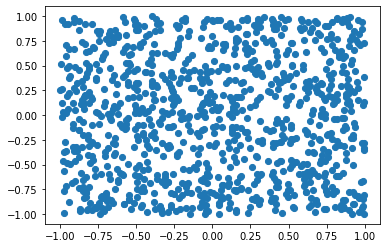

In [7]:
# a) Muestra de entrenamiento N = 1000, cuadrado [-1,1]x[-1,1]    
# Creo una figura 
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

# Creo el conjunto de datos
datos = simula_unif(1000, 2, 1)
print('Muestra N = 1000, cuadrado [-1,1]x[-1,1]')

# Dibujamos los datos
ax.scatter(datos[:, 0], datos[:, 1], color='tab:blue', marker = '.', s = 150)

plt.show()

Hemos creado un conjunto de valores que usaremos como conjunto de datos para hacer una regresión lineal


<font color='blue'>b) Consideremos la función $f(x_1, x_2) = sign((x_1 - 0.2)^2 + x^2_2 - 0.6)$ que usaremos para asignar una etiqueta a cada punto de la muestra anterior. Introducimos
ruido sobre las etiquetas cambiando el signo de un 10\% de las mismas elegido aleatoriamente. Pintar el mapa de etiquetas obtenido. </font>



Muestra N = 1000, cuadrado [-1,1]x[-1,1]
con etiquetas y ruido en el 10% de las etiquetas


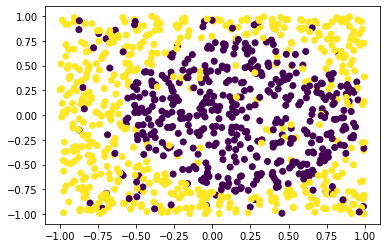

In [8]:
# b) Usamos la función f2 para asignar etiquetas a la muestra x e introducimos 
# ruido al 10% de las mismas

# Funcion signo
def sign(x):
    if x >= 0:
        return 1
    return -1

def f(x1, x2):
    return sign((x1-0.2)**2+x2**2-0.6) 

def introducir_ruido(y,porcent_ruido):
  # Dividimos el vector de etiquetas en dos subvectores, uno para cada clase
  y_clase1 = y[np.where(y==-1)]
  y_clase2 = y[np.where(y==1)]

  # Calculamos el número de etiquetas que corresponden a cada clase
  n_clase1 = y_clase1.shape[0]
  n_clase2 = y_clase2.shape[0]

  # Calculamos el número de etiquetas que deben cambiar de valor para introducir el porcentaje de ruido deseado
  n_ruido_clase1 = int(np.ceil(n_clase1 * (porcent_ruido / 100)))
  n_ruido_clase2 = int(np.ceil(n_clase2 * (porcent_ruido / 100)))

  # Generamos una lista aleatoria de índices de filas para seleccionar las filas que se van a modificar
  idx_filas_modificar = np.random.choice(y.shape[0], y.shape[0], replace=False)

  # Recorremos las filas correspondientes a los índices seleccionados y cambiamos la etiqueta por su contraria
  ruido_clase1 = 0
  ruido_clase2 = 0
  it = 0

  while n_ruido_clase1 > ruido_clase1 and n_ruido_clase2 > ruido_clase2:
    if y[idx_filas_modificar[it]] == -1 and n_ruido_clase1 > ruido_clase1:
      y[idx_filas_modificar[it]] = 1
      ruido_clase1 = ruido_clase1+1
    elif y[idx_filas_modificar[it]] == 1 and n_ruido_clase2 > ruido_clase2:
      y[idx_filas_modificar[it]] = -1
      ruido_clase2 = ruido_clase2+1

    it = it+1

  return y

# Creamos las etiquetas
y = np.empty(datos.shape[0], dtype=int)

for i in range(datos.shape[0]):
  y[i] = f(datos[i, 0], datos[i, 1])

# Añadimos ruido a la muestra
y_ruido = introducir_ruido(y, 10)

print ('Muestra N = 1000, cuadrado [-1,1]x[-1,1]')
print ('con etiquetas y ruido en el 10% de las etiquetas')

plt.figure()
plt.scatter(datos[:,0],datos[:,1], c=y_ruido)
plt.show()


Al conjunto de datos anterior le asignamos unas etiquetas, dependiendo de si los puntos están dentro del area de la función f(x1, x2) o fuera e introducimos ruido para simular un experimento real donde los grupos de datos no están perfectamente separados y puede haber valores anómalos.

<font color='blue'>c) Usando como vector de características $(1, x_1, x_2)$, ajustar un modelo de regresion
lineal al conjunto de datos generado y estimar los pesos $w$. Estimar el error de
ajuste $E_{in}$ y el porcentaje de acierto en clasificación usando SGD.</font>




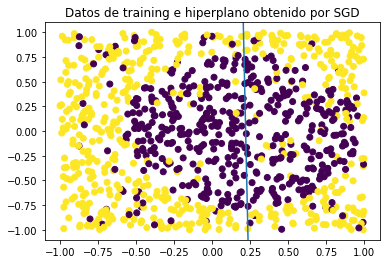

In [14]:
# c) Modelo de regresión lineal, estimar Ein con SGD

# Añadimos la caracteristica (1) al vector de características
datos_2 = np.insert(datos, 0, values=np.ones(datos.shape[0]), axis=1)

x = datos_2[:, :3]
y = y_ruido

w = sgd(x, y, 0.01, 200, 32)

fig, ax = plt.subplots()

# Dibujamos los datos
ax.scatter(x[:,1],x[:,2], c=y)

# Dibujamos el hiperplano
sgdX = np.linspace(0, 0.5, y.size)
sgdY = (-w[0] - w[1]*sgdX) / w[2]

ax.plot(sgdX, sgdY)

# Acotamos las coordenadas de la gráfica
ax.set(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))

ax.set_title('Datos de training e hiperplano obtenido por SGD')

plt.show()


Error de clasificación para el algoritmo de la pseudoinversa:

Numero de fallos:  413
Porcentaje de fallo:  41.3 


Bondad del resultado para el algoritmo de la pseudoinversa:

Ein:  0.9474738696635083
Eout:  0.9367874071411443


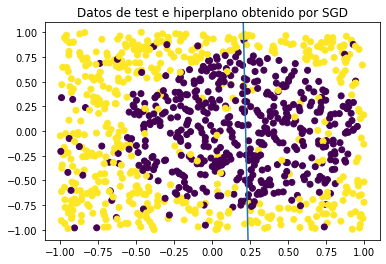

In [15]:
#Conjunto test
test = simula_unif(1000, 2, 1)

# Creamos las etiquetas
y_test = np.empty(test.shape[0], dtype=int)

for i in range(test.shape[0]):
  y_test[i] = f(test[i, 0], test[i, 1])

# Añadimos ruido a la muestra
y_test_ruido = introducir_ruido(y_test, 10)

# Añadimos la caracteristica (1) al vector de características
x_test = np.insert(test, 0, values=np.ones(datos.shape[0]), axis=1)

#Errores
n_fallos, porc_fallos = clasifError(w,x_test,y_test_ruido)
print ('\nError de clasificación para el algoritmo de la pseudoinversa:\n')
print ("Numero de fallos: ", n_fallos)
print ("Porcentaje de fallo: ", porc_fallos, '\n')

print ('\nBondad del resultado para el algoritmo de la pseudoinversa:\n')
print ("Ein: ", MSE(x,y,w))
print ("Eout: ", MSE(x_test, y_test_ruido, w))

#Gráfica
fig, ax = plt.subplots()

# Dibujamos los datos
ax.scatter(x_test[:,1],x_test[:,2], c=y_test_ruido)

# Dibujamos el hiperplano
sgdX = np.linspace(0, 0.5, y_test_ruido.size)
sgdY = (-w[0] - w[1]*sgdX) / w[2]

ax.plot(sgdX, sgdY)

# Acotamos las coordenadas de la gráfica
ax.set(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))

ax.set_title('Datos de test e hiperplano obtenido por SGD')

plt.show()

Como podemos observar tanto en la gráfica de training como en la de test la frontera de decisión no ajusta para nada nuestros datos, con los valores de los errores corroboramos esas sospechas, errores Ein y Eout casi de 1, por lo que ya de primeras nuestros pesos no han conseguido ajustarse para el conjunto de entrenamiento con éxito y luego para el conjunto test tampoco tenemos buen ajuste, con estos valores de errores más un porcentaje de fallo del 38.7% podemos asegurar que si le pasamos unas características a nuestro ajuste probablemente lo clasifique mal.

<font color='blue'>d) Ejecutar todo el experimento definido por (a)-(c) 1000 veces (generamos 1000
muestras diferentes) y

- <font color='blue'>Calcular el valor medio de los errores $E_{in}$ de las 1000 muestras.</font>

- <font color='blue'>Generar 1000 puntos nuevos por cada iteración y calcular con ellos el valor
de  $E_{out}$ en dicha iteración. Calcular el valor medio de $E_{out}$ en todas las
iteraciones.</font>


In [16]:
# d) Ejecutar el experimento 1000 veces

#Función para hacer los pasos a-c
def creaConjunto(n_datos, porc_ruido):
  #Conjunto test
  x = simula_unif(n_datos, 2, 1)

  # Creamos las etiquetas
  y = np.empty(x.shape[0], dtype=int)

  for i in range(x.shape[0]):
    y[i] = f(x[i, 0], x[i, 1])

  # Añadimos ruido a la muestra
  y_ruido = introducir_ruido(y, porc_ruido)

  # Añadimos la caracteristica (1) al vector de características
  x = np.insert(x, 0, values=np.ones(datos.shape[0]), axis=1)

  return x, y_ruido

#Inicializo los errores medios
e_in = 0
e_out = 0
fallos = 0
porc_fallos = 0

for i in range(1000):
  #Conjuntos training y test
  x,y = creaConjunto(1000, 10)
  x_test, y_test = creaConjunto(1000, 10)

  #Calculo pesos
  w = sgd(x, y, 0.01, 200, 32)

  #Sumo errores de la iteración
  e_in = e_in + MSE(x, y, w)
  e_out = e_out + MSE(x_test, y_test, w)
  e_clasificacion = clasifError(w,x_test,y_test)
  fallos = fallos + e_clasificacion[0]
  porc_fallos = porc_fallos + e_clasificacion[1]

#Calculo errores medios
e_in_medio = e_in/1000
e_out_medio = e_out/1000
fallos_medio = fallos/1000
porc_fallos_medio = porc_fallos/1000

print ('\nError medio de clasificación para el algoritmo del SGD:\n')
print ("Numero medio de fallos: ", fallos_medio)
print ("Porcentaje medio de fallo: ", porc_fallos_medio, '\n')

print ('\nBondad del resultado para el algoritmo del SGD:\n')
print ("Ein medio: ", e_in_medio)
print ("Eout medio: ", e_out_medio)



Error medio de clasificación para el algoritmo del SGD:

Numero medio de fallos:  405.443
Porcentaje medio de fallo:  40.544300000000035 


Bondad del resultado para el algoritmo del SGD:

Ein medio:  0.9293542388209485
Eout medio:  0.934007711648372


Ejecutando el experimento 1000 veces nos aseguramos de que el caso anterior no sea un caso aislado, y en efecto no lo era, esta ejecución nos termina de asegurar lo mal ajustados que están nuestros pesos aquí, era de esperar ya que es imposible para una recta actuar de frontera para este conjunto donde funcionará mucho mejor una frontera con forma circular. 


<font color='blue'>e) Valore qué tan bueno considera que es el ajuste con este modelo lineal a la vista
de los valores medios obtenidos de $E_{in}$ y $E_{out}$.</font>

Como hemos ido viendo y he comentado anteriormente un ajuste lineal debe funcionar de manera pésima para este conjunto, y los datos así lo confirman, valores altísimos para los errores de la función de pérdidas, así como que casi la mitad de los datos están mal clasificados. He probado a cambiar en número de iteraciones o el learning rate a la hora de calcular los pesos con el SDG, pero más por probar que otra cosa y como era de esperar no ha influido mucho en el ajuste, un pequeño descenso del número de casos mal clasificados pero nada relevante. Veo que ahora probaremos a hacer el ajuste con características no lineales, auguro unos valores mucho más bajos para los errores, veremos.

<font color='blue'>Repetir el mismo experimento anterior pero usando características no lineales. Ahora
usaremos el siguiente vector de características: $\phi_2(x) = (1, x_1, x_2, x_1x_2, x^2_1, x^2_2)$. Ajustar
el nuevo modelo de regresión lineal y calcular el nuevo vector de pesos $\hat{w}$. Calcular
los errores promedio de $E_{in}$ y $E_{out}$.

A la vista de los resultados de los errores promedios $E_{in}$ y $E_{out}$ obtenidos en los dos
experimentos, ¿qué modelo considera que es el más adecuado? Justifique la respuesta.</font>

In [17]:
### AHORA PROBAMOS CON CARACTERÍSTICAS NO LINEALES ####
#Función para hacer los pasos a-c usando características no lineales
def creaConjunto_v2(n_datos, porc_ruido):
  #Conjunto test
  x = simula_unif(n_datos, 2, 1)

  # Creamos las etiquetas
  y = np.empty(x.shape[0], dtype=int)

  for i in range(x.shape[0]):
    y[i] = f(x[i, 0], x[i, 1])

  # Añadimos ruido a la muestra
  y_ruido = introducir_ruido(y, porc_ruido)

  # Añadimos la caracteristica (1) al vector de características
  x = np.insert(x, 0, values=np.ones(datos.shape[0]), axis=1)

  # Añadimos nuevas columnas
  x_por_y = x[:, 1]*x[:, 2]
  x = np.hstack((x, x_por_y.reshape(-1, 1))) #x1*x2

  x1_cuadrado = x[:, 1]**2
  x = np.hstack((x, x1_cuadrado.reshape(-1, 1))) #x1**2

  x2_cuadrado = x[:, 2]**2
  x = np.hstack((x, x2_cuadrado.reshape(-1, 1))) #x2**2

  return x, y_ruido

# Redefinimos el SGD
np.random.seed(1)
def sgd(x, y, lr, max_iters, tam_minibatch, show_evol = False):
    w = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

    it = 0;

    #Creamos el minibatch
    x_y = np.hstack((x, y.reshape(-1, 1)))

    permutation = np.random.permutation(x_y.shape[0])
    x_y = x_y[permutation]

    num_minibatch = x_y.shape[0]/tam_minibatch
    list_minibatch = np.array_split(x_y, num_minibatch)
    minibatch = list_minibatch[0]

    while it < max_iters:
      w = w - lr * gradMSE(w, x_y[:, :-1], x_y[:, -1]) 
      it = it+1
       
    return w

#Inicializo los errores medios
e_in = 0
e_out = 0
fallos = 0
porc_fallos = 0

for i in range(1000):
  #Conjuntos training y test
  x,y = creaConjunto_v2(1000, 10)
  x_test, y_test = creaConjunto_v2(1000, 10)

  #Calculo pesos
  w = sgd(x, y, 0.1, 200, 32)

  #Sumo errores de la iteración
  e_in = e_in + MSE(x, y, w)
  e_out = e_out + MSE(x_test, y_test, w)
  e_clasificacion = clasifError(w,x_test,y_test)
  fallos = fallos + e_clasificacion[0]
  porc_fallos = porc_fallos + e_clasificacion[1]

#Calculo errores medios
e_in_medio = e_in/1000
e_out_medio = e_out/1000
fallos_medio = fallos/1000
porc_fallos_medio = porc_fallos/1000

print ('\nError medio de clasificación para el algoritmo del SGD:\n')
print ("Numero medio de fallos: ", fallos_medio)
print ("Porcentaje medio de fallo: ", porc_fallos_medio, '\n')

print ('\nBondad del resultado para el algoritmo del SGD:\n')
print ("Ein medio: ", e_in_medio)
print ("Eout medio: ", e_out_medio)



Error medio de clasificación para el algoritmo del SGD:

Numero medio de fallos:  138.098
Porcentaje medio de fallo:  13.809799999999989 


Bondad del resultado para el algoritmo del SGD:

Ein medio:  0.5660153956057448
Eout medio:  0.5729660983245737


En este caso los errores medios son menores que para la regresión lineal, había usado **200 iteraciones** para calcular los pesos en SGD, pero los errores medios me han parecido muy altos **(porcentaje medio de fallos = 26% y Ein y Eout = 0.76)**, por lo que he aumentado las iteraciones y estos han descendido, para **500 iteraciones** tenemos un **porcentaje medio de fallos del 16.1% y los Ein y Eout son de 0.65...**, y para **750 iteraciones** un **porcentaje medio de fallos del 13.7% y los Ein y Eout son de 0.61...**, el problema es que aumentar más el número de iteraciones empieza a ser costoso en tiempo, por lo que lo he **dejado en 500 iteraciones** ya que al añadir más iteraciones la mejora era ya muy pobre. 

Tras toquetear las iteraciones he pasado al learning rate, **los valores anteriores correspondían a un learning rate de 0.01**, lo he **aumentado (a 0.1)** para ver si al menos conseguía reducir el tiempo de ejecución, y no solo eso, sino que también han mejorado los valores de los errores sustancialmente, **(porcentaje medio de fallos = 13.76% y Ein y Eout = 0.57...)**, para un **learning rate de 0.2** los valores de los errores son prácticamente iguales, incluso empeora un poco el porcentaje medio de fallo, por lo que **dejo el learning rate en 0.1.**

Como conclusión decir que este ajuste tampoco parece el ideal ya que seguimos teniendo 137.58 datos mal clasificados de media, aunque teniendo en cuenta el 10% de ruido que introducimos está bastante bien, lo que si que puedo afirmar es que aquí los pesos y la frontera de decisión se ajustan mucho mejor que usando características lineales donde los valores de los errores eran altísimos y era muy probable que al introducir un nuevo dato nos lo clasificara mal.

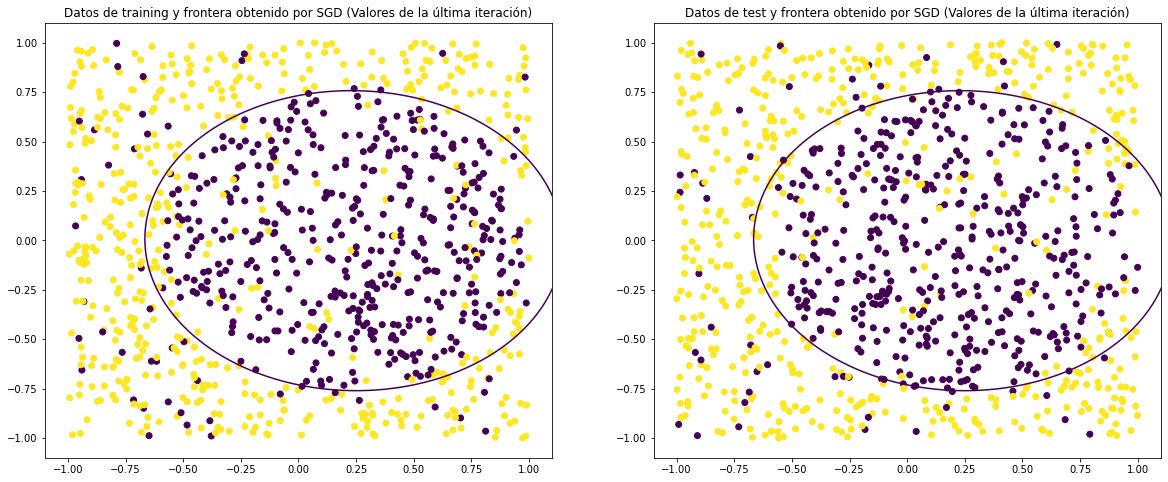

In [19]:
#Gráfica con valores de la última iteración
fig = plt.figure(figsize=(20,8))

# Training
ax = fig.add_subplot(1, 2, 1)

# Dibujamos los datos
ax.scatter(x[:,1],x[:,2], c=y)

# Dibujamos frontera
sgdX = np.linspace(-1, 1.5, y.size)
sgdY = np.linspace(-1, 1.5, y.size)

X, Y = np.meshgrid(sgdX, sgdY)
Z = w[0] + X*w[1] + Y*w[2] + X*Y*w[3] + w[4]*X**2 + w[5]*Y**2

plt.contour(X, Y, Z, levels=[0])

# Acotamos las coordenadas de la gráfica
ax.set(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))

ax.set_title('Datos de training y frontera obtenido por SGD (Valores de la última iteración)')


# Test
ax = fig.add_subplot(1, 2, 2)

# Dibujamos los datos
ax.scatter(x_test[:,1],x_test[:,2], c=y_test)

# Dibujamos frontera
sgdX = np.linspace(-1, 1.5, y_test.size)
sgdY = np.linspace(-1, 1.5, y_test.size)

X, Y = np.meshgrid(sgdX, sgdY)
Z = w[0] + X*w[1] + Y*w[2] + X*Y*w[3] + w[4]*X**2 + w[5]*Y**2

plt.contour(X, Y, Z, levels=[0])

# Acotamos las coordenadas de la gráfica
ax.set(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))

ax.set_title('Datos de test y frontera obtenido por SGD (Valores de la última iteración)')

plt.show()

Tras pintar las gráficas podemos observar por qué he dicho que el ajuste tampoco era perfecto, se ve claramente que ni para el conjunto de entrenamiento, ni para el de test termina de separar ambos conjuntos en algunas zonas. Tal vez haya que añadir distintas características para mejorar el ajuste, lo que es seguro es que esas características deben ser no lineales, ya que la mejora usando estas frente al ajuste lineal es muy notable. 



---

## <font color='blue'> Bonus (2 puntos). Método de Newton

El BONUS solo se tendrá en cuenta si se ha obtenido al menos el 75\% de los puntos de la
parte obligatoria.</font>

<font color='blue'>Implementar el algoritmo de minimización de Newton y aplicarlo a la función $f(x, y) = (x - 2)^2 + 2(y + 2)^2 + 2 sin(2 \pi x) sin(2 \pi y)$. Comiéncese desde los puntos iniciales $(-4.0, 4.0)$ y $(0.4,0.0)$, usando dos tasas de aprendizaje ($0.1$ y $0.01$), y $250$ iteraciones. Haga lo mismo con la función $g(x,y)=(x + 2)^2 + 3(y - 1)^2$ (mismos puntos de inicio, tasas de aprendizaje e iteraciones). 
</font>

<font color='blue'>Extraiga conclusiones sobre el comportamiento de los algoritmos comparando la curva de
decrecimiento de la función con el método de Newton y con el  gradiente descendente, tanto en esta función ($g(x,y)$) como en la anterior ($f(x,y)$). Debe mostrarse también una tabla que asocie puntos iniciales y tasas de aprendizaje con las coordenadas alcanzadas y el valor de la función en dichos puntos finales.

¿Se observa alguna diferencia en el comportamiento del método de Newton en estas funciones? De ser así, ¿a qué puede deberse? ¿Qué ventajas e inconvenientes presenta el método de Newton en contraposición al gradiente descendente?</font>



### <font color='blue'> $f(x, y) = (x - 2)^2 + 2(y + 2)^2 + 2 sin(2 \pi x) sin(2 \pi y)$</font>

In [ ]:
.... a completar por los estudiantes ....

In [ ]:
# Metodo de Newton
def newtonMethod(w, lr, grad_fun, fun, H, max_iters = 250):
    .... a completar por los estudiantes ....

In [ ]:
max_iters = 250

In [ ]:
.... a completar por los estudiantes ....

### <font color='blue'> $g(x,y)=(x + 2)^2 + 3(y - 1)^2$</font>

In [ ]:
.... a completar por los estudiantes ....

### <font color='blue'> Comparativa global. </font>

In [ ]:
.... a completar por los estudiantes ....

### <font color='blue'> Número de iteraciones necesarias para alcanzar un valor determinado.

Empléese gradiente descendente (usando una tasa de aprendizaje de $0.1$) y el método de Newton (sin learning rate) para minimizar la función $g(x,y)$ desde los puntos $(-4.0, 4.0)$ y $(0.4,0.0)$. Póngase un número máximo de iteraciones de $250$. ¿Cuántas iteraciones necesita cada algoritmo para alcanzar un valor de $1e-20$? </font>

In [ ]:
.... a completar por los estudiantes ....